# Prepare Enviroment & Dataset

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras joblib pydot xgboost gensim transformers datasets sentencepiece accelerate evaluate shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c8dab2f87514763ca32e61e105558fc93f222bcb7f155f7241df5db4bdaac8b2
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeAnTotNghiep/cleaned_no_duplicates.csv', sep=';',on_bad_lines="skip")
df.head(10)

url  label
0     https://google.com    1.0
1   https://facebook.com    1.0
2    https://youtube.com    1.0
3      https://baidu.com    1.0
4      https://yahoo.com    1.0
5     https://amazon.com    1.0
6  https://wikipedia.org    1.0
7         https://qq.com    1.0
8    https://twitter.com    1.0
9   https://google.co.in    1.0

In [ ]:
df.columns

Index(['url', 'label'], dtype='object')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_final_dataset_4.csv',
#                  sep=";",
#                  on_bad_lines='skip')
# df.head(10)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_final_dataset_4.csv'

In [ ]:
df[df['label'].isna()]


url  label
142670  http://www.tomshardware.com/reviews/gigabit-et...    NaN
142804                     http://vim.wikia.com/wiki/Copy    NaN
143038             http://www.biologyjunction.com/Viruses    NaN
143173  http://www.tomshardware.com/reviews/gpu-hierarchy    NaN
143443  http://www.tomsitpro.com/articles/next-generat...    NaN
...                                                   ...    ...
485177  https://get-workspace-resources-jsz.s3.ap-sout...    NaN
485797  https://international-2022-ifv.s3.us-east-1.am...    NaN
485920  https://managed-sync-2021.s3.us-west-1.amazona...    NaN
486292  https://now-streamlined-files-40y.s3.us-west-1...    NaN
486619  https://streamlined-analytics-files-jk.s3.eu-w...    NaN

[308 rows x 2 columns]

In [ ]:
df['label'] = pd.to_numeric(df['label'], errors='coerce')
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)


In [ ]:
Y1 = df['label']
X1 = df.drop(columns= ['url', 'label'])

In [ ]:
X1.head(2)

Empty DataFrame
Columns: []
Index: [0, 1]

In [ ]:
Y1.head(300000)

0         1
1         1
2         1
3         1
4         1
         ..
300249    0
300250    0
300251    0
300252    1
300253    0
Name: label, Length: 300000, dtype: int64

In [ ]:
X2 = df['url']
X2.head(2)

0      https://google.com
1    https://facebook.com
Name: url, dtype: object

In [ ]:
df.shape

(487044, 2)

In [ ]:
# Sử dụng hàm describe() của pandas trên cột 'type' trong dataframe df.
# Hàm này sẽ trả về các thông tin thống kê mô tả của cột 'type',
# bao gồm: count (số lượng giá trị không null), unique (số lượng giá trị duy nhất),
# top (giá trị xuất hiện nhiều nhất), freq (tần suất xuất hiện của giá trị top)
# nếu cột 'type' là dạng object (categorical/text).
df["label"].describe()


count    487044.00000
mean          0.50781
std           0.49994
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: label, dtype: float64

In [ ]:
df["label"].value_counts()

label
1    247326
0    239718
Name: count, dtype: int64

# Evaluation Helpler Functions

In [ ]:
def eval_graph_XGB(results):
    # Kiểm tra sự tồn tại của validation_0
    if 'validation_0' not in results:
        print("Error: Missing validation_0 in results. Check eval_set in fit().")
        return

    epochs = range(len(results['validation_0']['logloss']))

    # Biểu đồ Accuracy
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, [1 - x for x in results['validation_0']['error']], 'b', label='Train Accuracy (1 - Error)')
    if 'validation_1' in results:
        plt.plot(epochs, [1 - x for x in results['validation_1']['error']], 'r', label='Test Accuracy (1 - Error)')
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH (XGBoost)")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()

    # Biểu đồ Log Loss
    plt.figure(figsize=(14, 7))
    plt.plot(epochs, results['validation_0']['logloss'], 'b', label='Train Log Loss')
    if 'validation_1' in results:
        plt.plot(epochs, results['validation_1']['logloss'], 'r', label='Test Log Loss')
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH (XGBoost)")
    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.show()

    # Biểu đồ PR-AUC
    if 'aucpr' in results['validation_0']:
        plt.figure(figsize=(14, 7))
        plt.plot(epochs, results['validation_0']['aucpr'], 'b', label='Train PR-AUC')
        if 'validation_1' in results and 'aucpr' in results['validation_1']:
            plt.plot(epochs, results['validation_1']['aucpr'], 'r', label='Test PR-AUC')
        plt.legend(loc='upper left')
        plt.title("PR-AUC GRAPH (XGBoost)")
        plt.xlabel("Iteration")
        plt.ylabel("PR-AUC")
        plt.show()
    else:
        print("Warning: PR-AUC metric not found in results. Ensure 'aucpr' is in eval_metric.")


In [ ]:
def conf_matrix_XGB(X_test, y_test, model, label_names=['phishing', 'benign']):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Vẽ Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX (XGBoost)')
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_names))

    # Predict proba cho metrics
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Tính PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"PR-AUC (Test): {pr_auc:.4f}")

    # Tính ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC (Test): {roc_auc:.4f}")

In [ ]:
def conf_matrix_RF(X_test, y_test, model, label_names=['phishing', 'benign']):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title("CONFUSION MATRIX (RandomForest)")
    plt.show()

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_names))

    # Accuracy riêng
    acc = np.mean(y_pred == y_test)
    print(f"Accuracy (Test): {acc:.4f}")

In [ ]:
def pr_roc_RF(X_test, y_test, model):
    """Vẽ ROC curve và PR curve cho RandomForest"""
    # predict_proba trả ra xác suất cho mỗi lớp
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE (RandomForest)")
    plt.legend()
    plt.show()

    # Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(7, 6))
    plt.plot(recall, precision, label=f"PR-AUC = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("PRECISION-RECALL CURVE (RandomForest)")
    plt.legend()
    plt.show()

    print(f"ROC-AUC (Test): {roc_auc:.4f}")
    print(f"PR-AUC  (Test): {pr_auc:.4f}")

In [ ]:
def feature_importance_RF(model, feature_names=None, top_n=20):
    """Vẽ top-n feature importance cho RandomForest"""
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]

    if feature_names is None:
        feature_names = [f"f{i}" for i in range(len(importances))]

    plt.figure(figsize=(10, 6))
    plt.bar(range(top_n), importances[indices], align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.title(f"Top-{top_n} Feature Importances (RandomForest)")
    plt.tight_layout()
    plt.show()

In [ ]:
def conf_matrix_KNN_SVM(X_test, y_test, model, model_name, label_names=['phishing', 'benign']):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title(f"Confusion Matrix {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    plt.show()

In [ ]:
def pr_roc_KNN_SVM(X_test, y_test, model, model_name="Model"):
    # Nếu y_test là one-hot thì chuyển về vector nhãn
    if len(y_test.shape) > 1 and y_test.shape[1] == 2:
        y_test = np.argmax(y_test, axis=1)

    # Lấy xác suất class 1
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(12,5))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()

    # PR
    plt.subplot(1,2,2)
    plt.plot(recall, precision, label=f"AUC = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend()

    plt.show()

    print(f"[{model_name}] ROC-AUC = {roc_auc:.4f}, PR-AUC = {pr_auc:.4f}")


In [ ]:
def eval_graph_CNN(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()

    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score as sk_f1_score

def conf_matrix_CNN(X_test, Y_test, model, label_names=['phishing', 'benign']):
    # reshape nếu cần
    X_test = np.array(X_test)
    if len(X_test.shape) == 2:
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # dự đoán nhãn (binary: threshold 0.5)
    Y_pred_proba = model.predict(X_test).ravel()
    Y_pred = (Y_pred_proba > 0.5).astype(int)

    # ground truth
    Y_test_labels = np.array(Y_test).astype(int)

    # confusion matrix
    cm = confusion_matrix(Y_test_labels, Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

    # F1-score
    f1 = sk_f1_score(Y_test_labels, Y_pred, average='binary')
    print(f"F1-Score: {f1:.4f}")


In [ ]:
def pr_roc_CNN(X_test, Y_test, model):
    # đảm bảo numpy array
    X_test = np.array(X_test)
    Y_test = np.array(Y_test).astype(int)

    # reshape nếu cần
    if len(X_test.shape) == 2:
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # dự đoán xác suất
    Y_pred_proba = model.predict(X_test).ravel()

    # --- Precision-Recall ---
    precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(7, 6))
    plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (CNN/CNN_LSTM)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
    roc_auc = roc_auc_score(Y_test, Y_pred_proba)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (CNN/CNN_LSTM)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    print(f"PR-AUC : {pr_auc:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    return pr_auc, roc_auc

In [ ]:
def conf_matrix_ALBERT(y_true, y_pred, label_names=["phishing","benign"]):
  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
  disp.plot(cmap=plt.cm.YlGn)
  plt.title("Confusion Matrix (ALBERT)")
  plt.show()

In [ ]:
def pr_roc_ALBERT(y_true, y_pred_proba):
  # === ROC Curve ===
  fpr, tpr, _ = roc_curve(y_true, y_probs)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
  plt.plot([0,1],[0,1],"--",color="gray")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()

  # === Precision-Recall Curve ===
  prec, rec, _ = precision_recall_curve(y_true, y_probs)
  plt.plot(rec, prec, label=f"PR curve (AP = {average_precision_score(y_true,y_probs):.2f})")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()

In [ ]:
def eval_graph_ALBERT(history):
  plt.plot(history["step"], history["loss"], label="train loss")
  if "eval_loss" in history:
      eval_history = history.dropna(subset=["eval_loss"])
      plt.plot(eval_history["step"], eval_history["eval_loss"], label="eval loss")
  plt.xlabel("Step")
  plt.ylabel("Loss")
  plt.title("Training vs Validation Loss")
  plt.legend()
  plt.show()

  # Nếu bạn log cả metrics (eval_accuracy, eval_f1, …) bạn có thể vẽ tương tự
  if "eval_f1" in history:
      plt.plot(eval_history["epoch"], eval_history["eval_f1"], marker="o")
      plt.xlabel("Epoch")
      plt.ylabel("F1-score")
      plt.title("Validation F1 over Epochs")
      plt.show()

# XGB Model

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
from xgboost import XGBClassifier
from xgboost import plot_importance

xgb = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.08,
    n_estimators=300,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.5,
    reg_alpha=0.5,
    eval_metric=['logloss', 'error', 'aucpr'],
    random_state=42,
    n_jobs=-1
)

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# KNN Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
KNN = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, metric='minkowski'))
])

# SVM Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
SVM = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True))
])

# BiLSTM Model

In [ ]:
from keras import layers, Sequential
def BiLSTM(input_size):
    model = Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    model.add(layers.Bidirectional(layers.LSTM(32)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

BiLSTM_model1 = BiLSTM((81,1))
BiLSTM_model2 = BiLSTM((50,1))
BiLSTM_model1.summary()
BiLSTM_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 81, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,233 (309.50 KB)

 Trainable params: 79,233 (309.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 50, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,233 (309.50 KB)

 Trainable params: 79,233 (309.50 KB)

 Non-trainable params: 0 (0.00 B)

# CNN Model

In [ ]:
from keras import layers, Sequential

def CNN(input_size):
    model = Sequential()
    model.add(layers.Input(input_size))

    model.add(layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

CNN_model1 = CNN((81,1))
CNN_model2 = CNN((50,1))
CNN_model1.summary()
CNN_model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 81, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 81, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 81, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 41, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 41, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 21, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       344,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,257 (1.44 MB)

 Trainable params: 375,809 (1.43 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 50, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 25, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 25, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 13, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       213,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,185 (957.75 KB)

 Trainable params: 244,737 (956.00 KB)

 Non-trainable params: 448 (1.75 KB)

# CNN-LSTM Model

In [ ]:
from keras import layers, Sequential

def CNN_LSTM(input_size):
    model = Sequential()
    model.add(layers.Input(input_size))

    model.add(layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2, padding='same'))

    model.add(layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())

    # Thay GlobalMaxPooling1D bằng LSTM
    model.add(layers.LSTM(64, return_sequences=False))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

CNN_LSTM_model1 = CNN_LSTM((81,1))
CNN_LSTM_model2 = CNN_LSTM((50,1))
CNN_LSTM_model1.summary()
CNN_LSTM_model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 81, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 81, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 81, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 41, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 41, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 41, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 21, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 21, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,793 (350.75 KB)

 Trainable params: 89,345 (349.00 KB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 50, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 50, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 25, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 25, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 13, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 13, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,793 (350.75 KB)

 Trainable params: 89,345 (349.00 KB)

 Non-trainable params: 448 (1.75 KB)

# CharCNN Model

In [ ]:
import numpy as np
import string
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

char_tokenizer = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_Char_Tokenizer.joblib")
vocab_size = len(char_tokenizer.word_index) + 1
MAX_LEN = 200
EMBED_DIM = 64

def CharCNN(vocab_size, max_len=MAX_LEN, embed_dim=EMBED_DIM):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len),

        Conv1D(256, kernel_size=5, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),

        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),

        Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

CharCNN_model = CharCNN(vocab_size)
CharCNN_model.build(X_train7.shape)
CharCNN_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (389635, 200, 64)      │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (389635, 200, 256)     │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (389635, 100, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (389635, 100, 128)     │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (389635, 50, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (389635, 50, 64)       │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (389635, 25, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (389635, 1600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (389635, 128)          │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (389635, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (389635, 1)            │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,129 (1.59 MB)

 Trainable params: 416,129 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

# CharCNN-LSTM Model

In [ ]:
import numpy as np
import string
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional

char_tokenizer = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_Char_Tokenizer.joblib")
vocab_size = len(char_tokenizer.word_index) + 1
MAX_LEN = 200
EMBED_DIM = 64

def CharCNN_LSTM(vocab_size, max_len=MAX_LEN, embed_dim=EMBED_DIM):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len),

        # --- CNN feature extractor ---
        Conv1D(256, kernel_size=5, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),

        Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),

        # --- LSTM sequence encoder ---
        Bidirectional(LSTM(64, dropout=0.2, return_sequences=False)),

        # --- Dense layers ---
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

CharCNN_LSTM_model = CharCNN_LSTM(vocab_size)
CharCNN_LSTM_model.build(X_train7.shape)
CharCNN_LSTM_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (389635, 200, 64)      │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (389635, 200, 256)     │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (389635, 100, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (389635, 100, 128)     │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (389635, 50, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (389635, 128)          │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (389635, 128)          │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (389635, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (389635, 1)            │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,889 (1.15 MB)

 Trainable params: 301,889 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

# Tranning Word2Vec And Embedding URL

In [ ]:
from gensim.models import Word2Vec
from urllib.parse import urlparse
import re
import joblib

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_final_dataset.csv",sep=";")
# df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_final_dataset.csv'

In [ ]:
df.head()

url  label
0    https://google.com      1
1  https://facebook.com      1
2   https://youtube.com      1
3     https://baidu.com      1
4     https://yahoo.com      1

In [ ]:
from sklearn.model_selection import train_test_split
X_train_urls, X_test_urls, y_train, y_test = train_test_split(
    df['url'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

In [ ]:
def preprocess_url(url):
    url = url.decode('utf-8') if isinstance(url, bytes) else url
    url = url.lower()
    parsed = urlparse(url)
    tokens = []
    if parsed.scheme:
        tokens.append(parsed.scheme)
    domain_parts = parsed.netloc.split('.')
    tokens.extend(domain_parts)
    if parsed.path:
        path_parts = [p for p in parsed.path.split('/') if p]
        tokens.extend(path_parts)
    if parsed.query:
        query_parts = parsed.query.split('&')
        tokens.extend(query_parts)
    tokens = [re.sub(r'[^a-z0-9\-\/.=]', '', token) for token in tokens if token]
    return tokens

In [ ]:
corpus_train = [preprocess_url(url) for url in X_train_urls]
corpus_test = [preprocess_url(url) for url in X_test_urls]

In [ ]:
#Huấn luyện Word2Vec
w2v_model = Word2Vec(sentences=corpus_train, vector_size=50, window=5, min_count=1, sg=1)
w2v_model.train(corpus_train, total_examples=len(corpus_train), epochs=10)

(10786550, 17990660)

In [ ]:
def Url2Vec(tokens, w2v_model, embedding_dim=50):
    vectors = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

In [ ]:
# Embedding URL thành dạng vector có dims = 50
X_train_embed = np.array([Url2Vec(tokens, w2v_model, embedding_dim=50) for tokens in corpus_train])
X_test_embed  = np.array([Url2Vec(tokens, w2v_model, embedding_dim=50) for tokens in corpus_test])

In [ ]:
w2v_model.save("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_URL2Vec.model") #Lưu model để phục vụ dự đoán sau này
joblib.dump(X_train_embed, "/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl") #Lưu đặc trưng embedding để khỏi cần chạy lại sau này
joblib.dump(X_test_embed, "/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
joblib.dump(y_train, "/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
joblib.dump(y_test, "/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")

['/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl']

In [ ]:
X_train_embed[:1]

array([[-1.2700875 ,  1.0031611 ,  0.5732008 ,  0.3895794 , -0.1472383 ,
        -1.1915727 ,  0.4409575 , -0.3880091 , -0.19892435,  0.03558867,
         0.812842  , -0.01596886,  0.08357948, -0.01426268,  0.65302384,
         0.42323774,  1.9861131 ,  0.20774323, -0.34056377,  0.19312157,
        -0.149091  ,  0.8043198 ,  1.2373862 ,  0.7609311 ,  0.20559049,
        -0.03136195,  0.47947818,  1.5656525 , -0.4460868 , -0.50799656,
        -0.48714828, -0.04881666,  0.37408763,  0.38186985, -0.5266435 ,
        -0.30342877,  0.17348172, -1.1268224 , -0.4193485 ,  0.23767586,
        -0.58957416,  0.51435095, -0.0754147 , -1.1172369 , -0.38115802,
         0.78607726, -0.47675237, -0.36457953,  0.7373479 ,  1.5995708 ]],
      dtype=float32)

# Prepare Train/Test For XGB/RF/KNN/SVM (URL Embedding)

In [ ]:
import joblib
X_train2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
X_test2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
Y_train2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
Y_test2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")
print(X_train2.shape, Y_train2.shape)
print(X_test2.shape, Y_test2.shape)

(389635, 50) (389635,)
(97409, 50) (97409,)


In [ ]:
Y_test2.value_counts()

label
1    49465
0    47944
Name: count, dtype: int64

In [ ]:
Y_train2.value_counts()

label
1    197861
0    191774
Name: count, dtype: int64

# Training & Evaluation XGB Models With Embedding URL

In [ ]:
eval_set = [(X_train2, Y_train2), (X_test2, Y_test2)]
xgb.fit(
    X_train2, Y_train2,
    eval_set=eval_set,
    verbose=50
)

[0]	validation_0-logloss:0.65054	validation_0-error:0.15722	validation_0-aucpr:0.91656	validation_1-logloss:0.65904	validation_1-error:0.24727	validation_1-aucpr:0.79486
[50]	validation_0-logloss:0.25446	validation_0-error:0.09231	validation_0-aucpr:0.95753	validation_1-logloss:0.36277	validation_1-error:0.13541	validation_1-aucpr:0.86350
[100]	validation_0-logloss:0.22047	validation_0-error:0.08135	validation_0-aucpr:0.96624	validation_1-logloss:0.36189	validation_1-error:0.12958	validation_1-aucpr:0.87881
[150]	validation_0-logloss:0.20432	validation_0-error:0.07590	validation_0-aucpr:0.97027	validation_1-logloss:0.37514	validation_1-error:0.12807	validation_1-aucpr:0.89083
[200]	validation_0-logloss:0.19437	validation_0-error:0.07215	validation_0-aucpr:0.97274	validation_1-logloss:0.40419	validation_1-error:0.12361	validation_1-aucpr:0.87903
[250]	validation_0-logloss:0.18760	validation_0-error:0.06982	validation_0-aucpr:0.97441	validation_1-logloss:0.44083	validation_1-error:0.1276

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=['logloss', 'error', 'aucpr'], feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
results = xgb.evals_result()

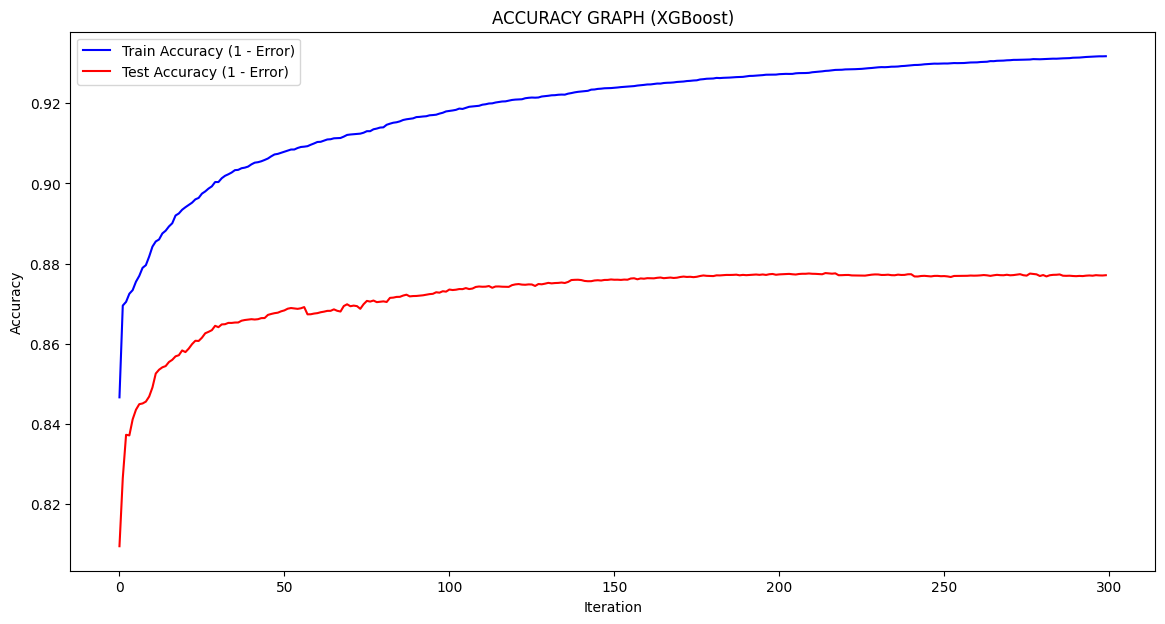

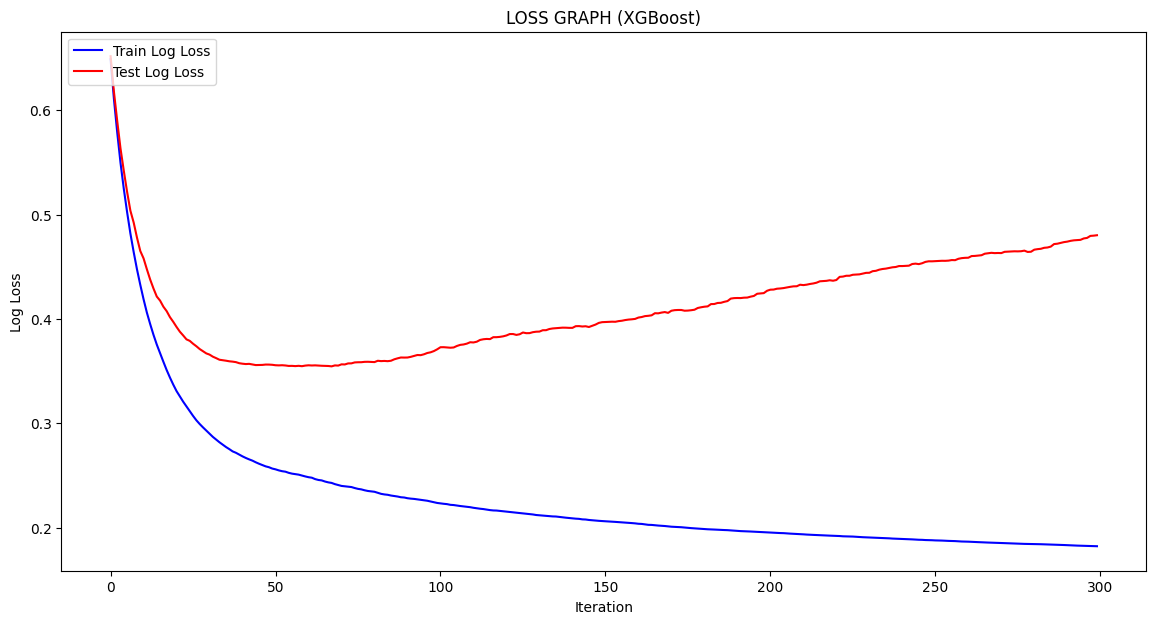

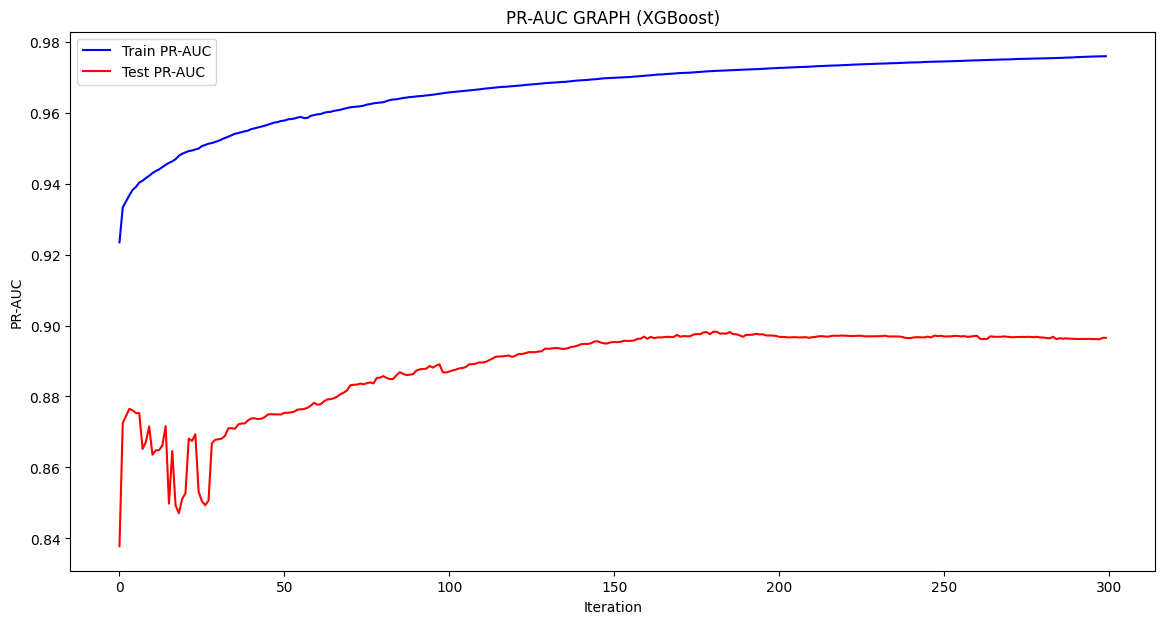

In [ ]:
eval_graph_XGB(results)

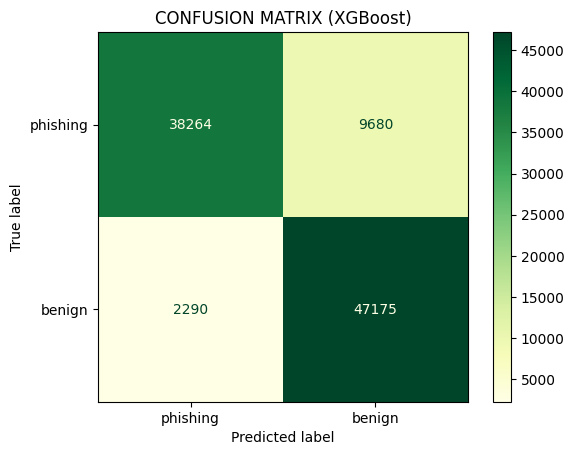


Classification Report:
              precision    recall  f1-score   support

    phishing       0.94      0.80      0.86     47944
      benign       0.83      0.95      0.89     49465

    accuracy                           0.88     97409
   macro avg       0.89      0.88      0.88     97409
weighted avg       0.89      0.88      0.88     97409

PR-AUC (Test): 0.9015
ROC-AUC (Test): 0.9232


In [ ]:
conf_matrix_XGB(X_test2, Y_test2, xgb, label_names=['phishing', 'benign'])

In [ ]:
xgb.save_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_XGB_URL_Embedding.json")

In [ ]:
from gensim.models import Word2Vec
from urllib.parse import urlparse
import re
import xgboost as xgb

def preprocess_url(url):
    url = url.decode('utf-8') if isinstance(url, bytes) else url
    url = url.lower()
    parsed = urlparse(url)
    tokens = []
    if parsed.scheme:
        tokens.append(parsed.scheme)
    domain_parts = parsed.netloc.split('.')
    tokens.extend(domain_parts)
    if parsed.path:
        path_parts = [p for p in parsed.path.split('/') if p]
        tokens.extend(path_parts)
    if parsed.query:
        query_parts = parsed.query.split('&')
        tokens.extend(query_parts)
    tokens = [re.sub(r'[^a-z0-9\-\/.=]', '', token) for token in tokens if token]
    return tokens

def Url2Vec(tokens, w2v_model, embedding_dim=100):
    vectors = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

w2v_model = Word2Vec.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_URL2Vec.model")
xgb = xgb.XGBClassifier()
xgb.load_model('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_XGB_URL_Embedding.json')

def predict_url_realtime_xgb(url, w2v_model, xgb_model, embedding_dim=100):
    # Tiền xử lý URL
    tokens = preprocess_url(url)
    print("Tokens:", tokens)

    # Tạo embedding
    url_vector = Url2Vec(tokens, w2v_model, embedding_dim)
    url_vector = url_vector.reshape(1, -1)  # Reshape thành (1, 100)

    # Dự đoán nhãn và xác suất
    prediction = xgb_model.predict(url_vector)[0]
    proba = xgb_model.predict_proba(url_vector)[0]

    # Chuyển nhãn thành tên (0=Phishing, 1=Benign)
    label = "Phishing" if prediction == 0 else "Benign"
    proba_phishing = proba[0]  # Xác suất lớp 0 (phishing)
    proba_benign = proba[1]    # Xác suất lớp 1 (benign) để kiểm tra

    return {
        "url": url,
        "tokens": tokens,
        "embedding": url_vector,
        "label": label,
        "probability_phishing": proba_phishing,
        "probability_benign": proba_benign
    }

In [ ]:
result = predict_url_realtime_xgb("https://www.flexclip.com/", w2v_model, xgb)
print(f"Embedding: {result['embedding']}")

Tokens: ['https', 'www', 'flexclip', 'com']
Embedding: [[-0.70421886  0.01845101  0.01060859  0.4405609   0.18204825 -0.4764074
   1.1383477   0.36138248 -0.38136646 -0.2797837   0.46227536  0.13215357
  -0.24345134  0.02676741  0.16208635  0.5838434   0.38681778  0.46772894
  -0.56484634 -0.47924852  1.1806763   0.9203854   0.892364   -0.06414933
  -0.36012354 -0.33773533  1.0546604   1.6224686  -0.22526853 -0.26583576
  -1.2824235   0.08623648  1.1055576  -0.10052112 -0.2779756  -0.65598655
   0.2970627  -0.89399815 -0.66360694  0.5343252  -0.5507477   0.87859106
  -0.48395917  0.08772839 -0.88928074  0.4890503  -1.191155   -0.73415
   0.7231264   0.9054136 ]]


In [ ]:
# Dự đoán
result = predict_url_realtime_xgb("https://uis.ptithcm.edu.vn/#/home", w2v_model, xgb)

# Hiển thị kết quả
print("\nKết quả dự đoán:")
print(f"URL: {result['url']}")
print(f"Tokens: {result['tokens']}")
print(f"Nhãn dự đoán: {result['label']}")
print(f"Xác suất phishing: {result['probability_phishing']:.4f}")
print(f"Xác suất benign: {result['probability_benign']:.4f}")
print(f"Tổng xác suất: {result['probability_phishing'] + result['probability_benign']:.4f}")  # Nên ≈ 1.0

Tokens: ['https', 'uis', 'ptithcm', 'edu', 'vn']

Kết quả dự đoán:
URL: https://uis.ptithcm.edu.vn/#/home
Tokens: ['https', 'uis', 'ptithcm', 'edu', 'vn']
Nhãn dự đoán: Benign
Xác suất phishing: 0.1144
Xác suất benign: 0.8856
Tổng xác suất: 1.0000


# XGB Explaination Using SHAP (URL Embedding)

In [ ]:
import shap
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.load_model('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_XGB_URL_Embedding.json')
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test2)

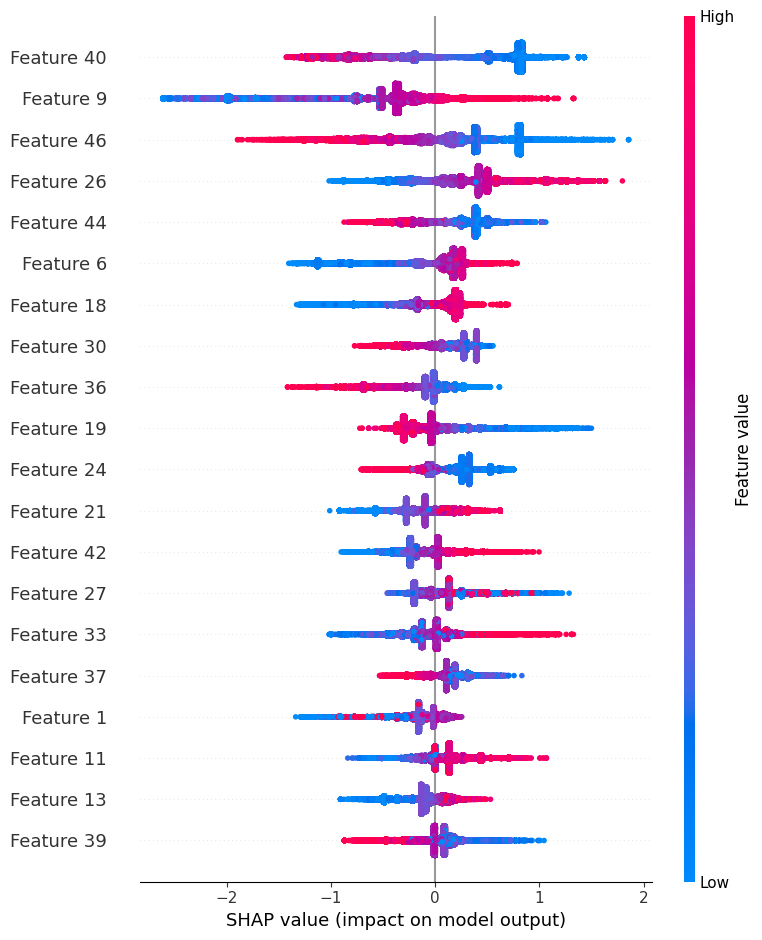

In [ ]:
shap.summary_plot(shap_values_xgb, X_test2)

In [ ]:
Y_test2.iloc[33]

np.int64(0)

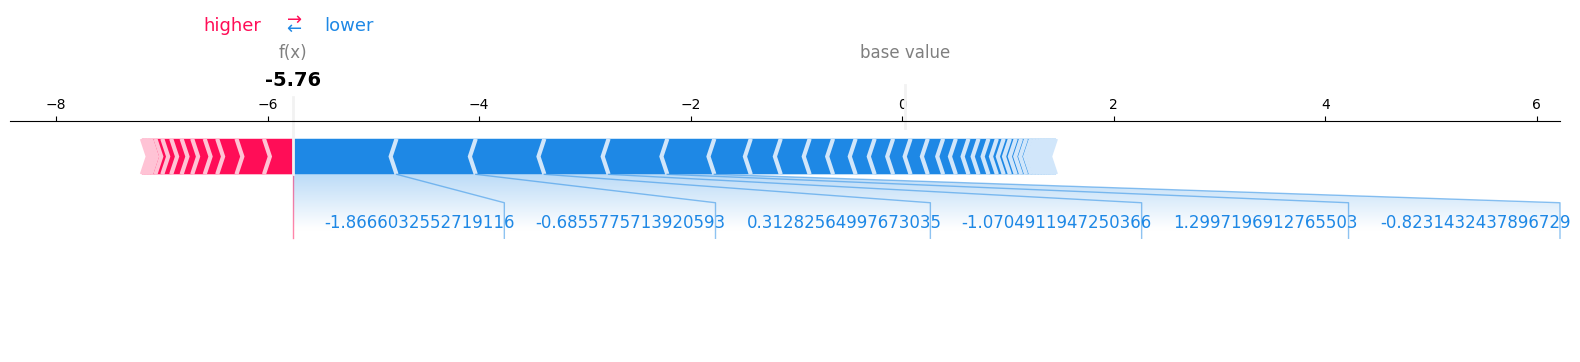

In [ ]:
shap.initjs()
shap.force_plot(
    explainer_xgb.expected_value,
    shap_values_xgb[33, :].astype(float),
    X_test2[33, :].astype(float),
    matplotlib=True
)

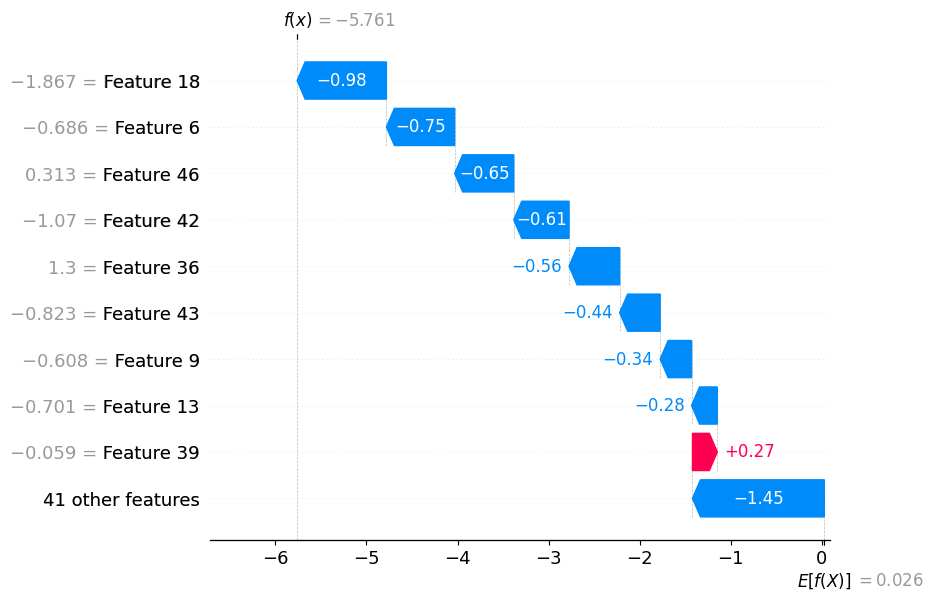

In [ ]:
shap.plots.waterfall(
    shap.Explanation(
        values = shap_values_xgb[33],
        base_values = explainer_xgb.expected_value,
        data = X_test2[33],
        feature_names = [f"Feature {i}" for i in range(X_test2.shape[1])]
    )
)

In [ ]:
print(Y_test2.iloc[33])

0


In [ ]:
Y_test2.iloc[121]

np.int64(1)

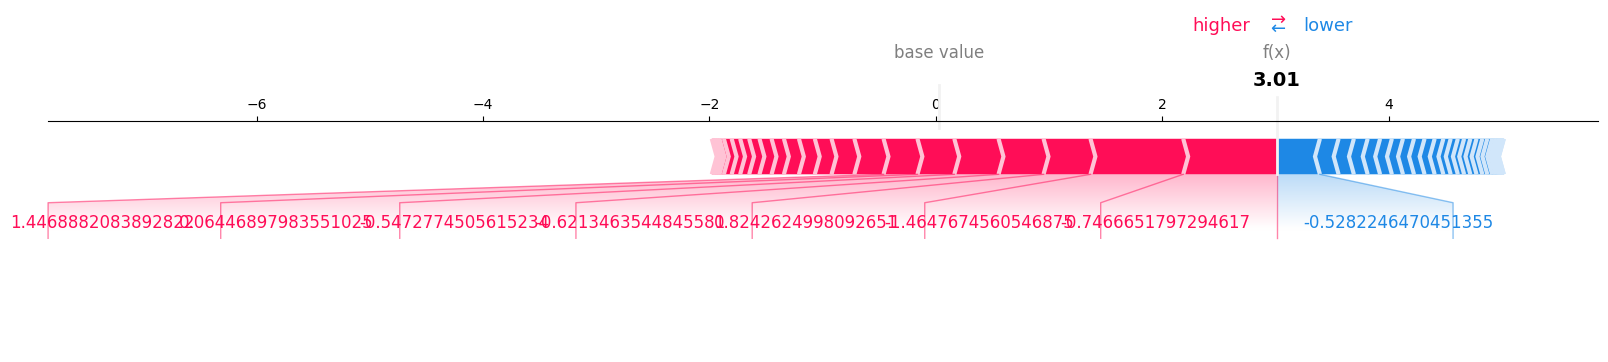

In [ ]:
shap.initjs()
shap.force_plot(
    explainer_xgb.expected_value,
    shap_values_xgb[121, :].astype(float),
    X_test2[121, :].astype(float),
    matplotlib=True
)

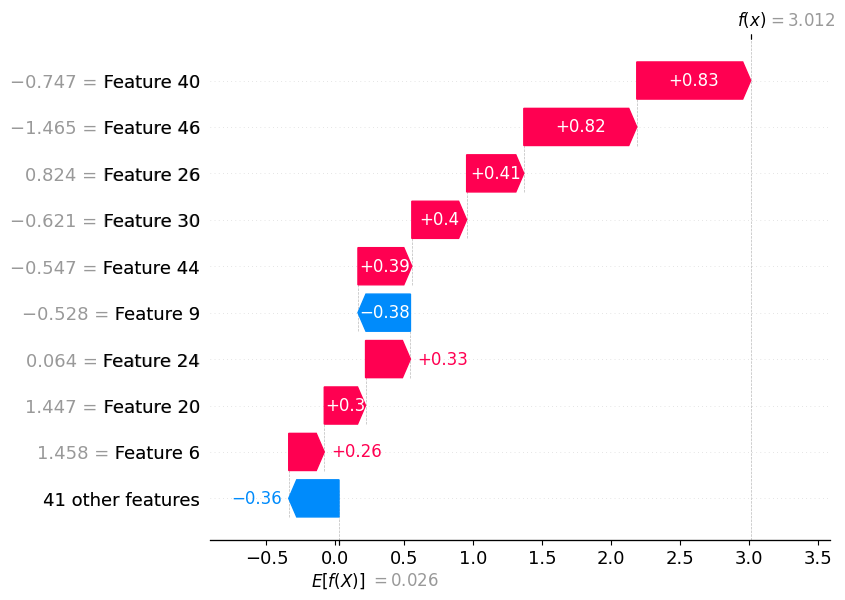

In [ ]:
shap.plots.waterfall(
    shap.Explanation(
        values = shap_values_xgb[121],
        base_values = explainer_xgb.expected_value,
        data = X_test2[121],
        feature_names = [f"Feature {i}" for i in range(X_test2.shape[1])]
    )
)

In [ ]:
print(Y_test2.iloc[121])

1


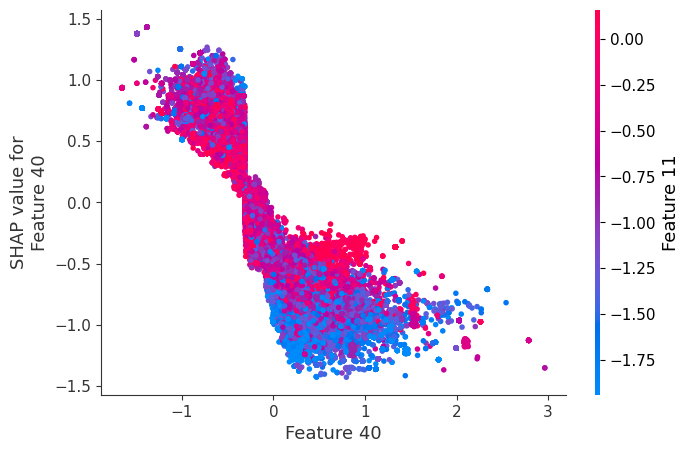

In [ ]:
shap.dependence_plot("Feature 40", shap_values_xgb, X_test2)

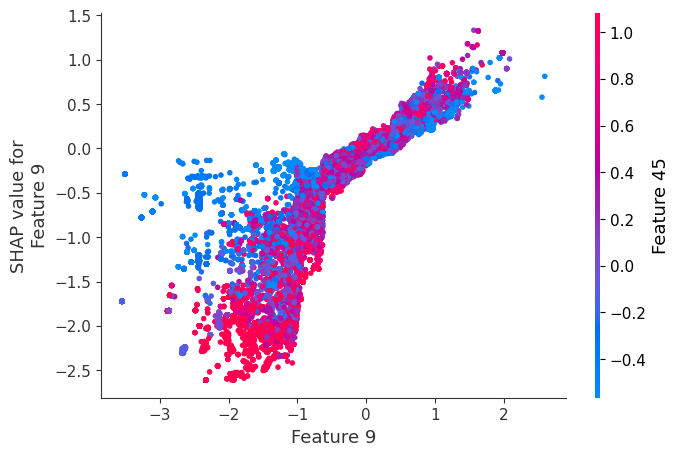

In [ ]:
shap.dependence_plot("Feature 9", shap_values_xgb, X_test2)

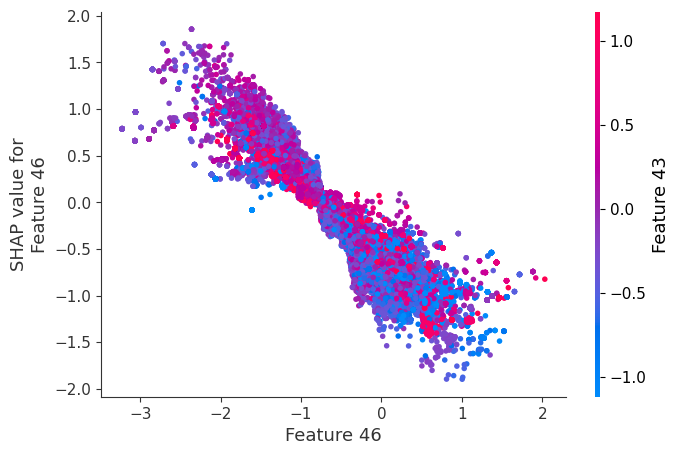

In [ ]:
shap.dependence_plot("Feature 46", shap_values_xgb, X_test2)

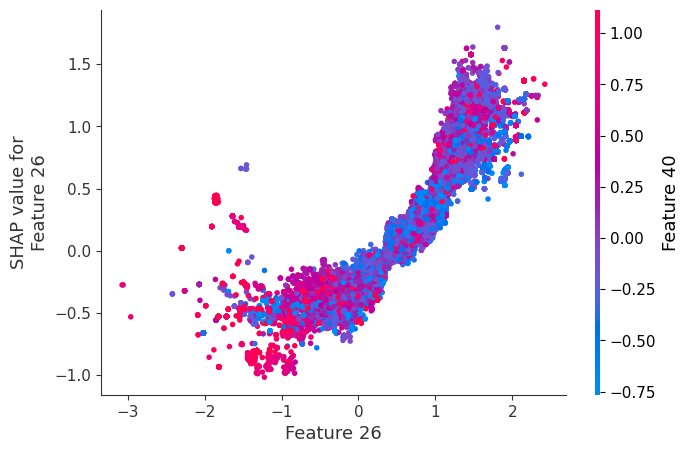

In [ ]:
shap.dependence_plot("Feature 26", shap_values_xgb, X_test2)

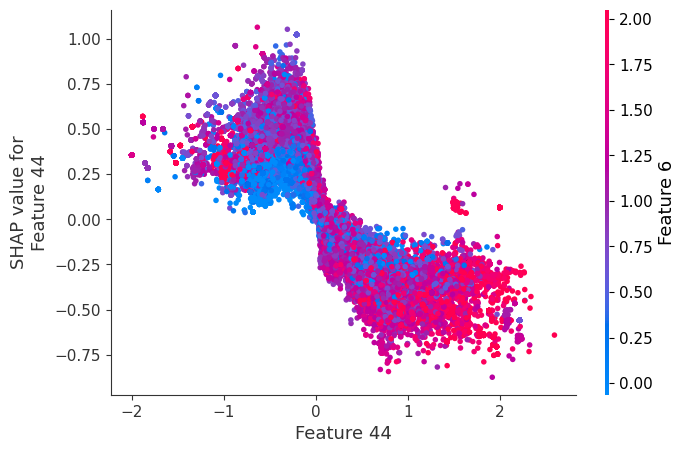

In [ ]:
shap.dependence_plot("Feature 44", shap_values_xgb, X_test2)

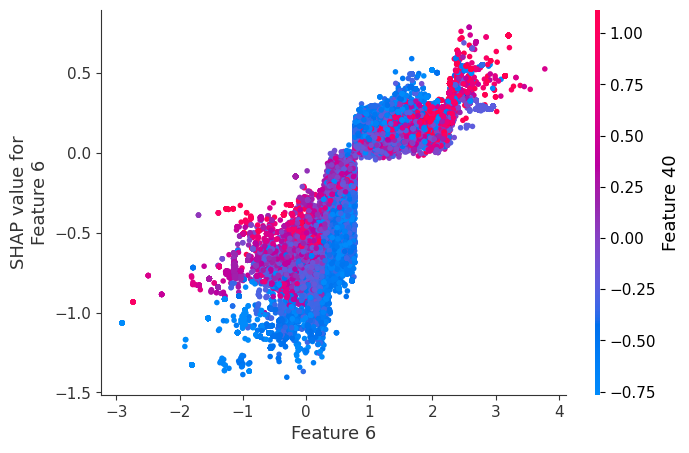

In [ ]:
shap.dependence_plot("Feature 6", shap_values_xgb, X_test2)

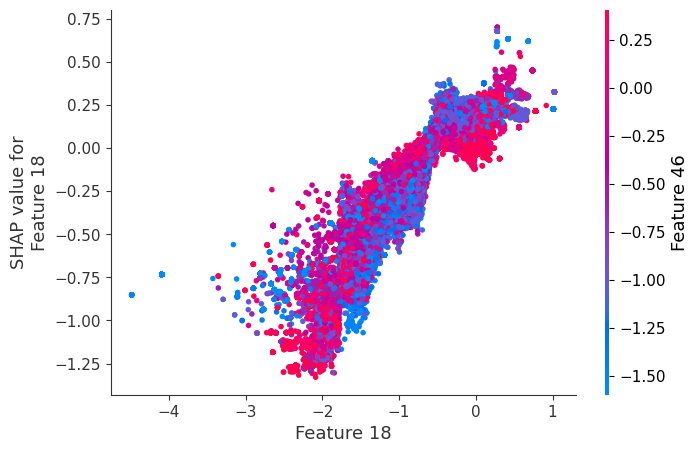

In [ ]:
shap.dependence_plot("Feature 18", shap_values_xgb, X_test2)

In [ ]:
from gensim.models import Word2Vec
import numpy as np

w2v = Word2Vec.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_URL2Vec.model")
tokens = list(w2v.wv.index_to_key)       # list token trong vocab
vectors = w2v.wv.vectors  # shape = (vocab_size, embedding_dim)

In [ ]:
def top_tokens_for_dim(dim, topn=10):
    """
    Trả về top token có giá trị embedding lớn nhất và nhỏ nhất tại chiều `dim`.
    """
    values = vectors[:, dim]
    sorted_idx = np.argsort(values)

    # top âm (nhỏ nhất)
    low_tokens = [(tokens[i], values[i]) for i in sorted_idx[:topn]]
    # top dương (lớn nhất)
    high_tokens = [(tokens[i], values[i]) for i in sorted_idx[-topn:]]

    return low_tokens, high_tokens

In [ ]:
dim = 40
low, high = top_tokens_for_dim(dim, topn=10)

print(f"Chiều {dim} - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print(f"\nChiều {dim} - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 40 - Top token kéo âm:
us: -2.9793
cn: -2.6527
xyz: -2.5397
p: -2.2759
gr: -2.1859
ua: -2.1690
r: -1.9565
users: -1.9070
appspot: -1.8839
8: -1.8480

Chiều 40 - Top token kéo dương:
ca: 2.9884
html: 3.0247
region.php: 3.0917
tools: 3.6463
ietf: 3.6736
ead: 3.7433
q-r: 3.8401
qrco: 3.8553
tw1: 4.0151
to: 4.8479


In [ ]:
dim = 46
low, high = top_tokens_for_dim(dim, topn=10)

print(f"Chiều {dim} - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print(f"\nChiều {dim} - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 46 - Top token kéo âm:
yahoo: -4.9030
eu: -4.5435
topic: -4.4453
group: -4.1849
wixsite: -4.0809
tech: -4.0261
dl=0: -3.8643
view: -3.7536
dropbox: -3.7272
scl: -3.5527

Chiều 46 - Top token kéo dương:
ch: 2.3067
ir: 2.5188
xyz: 2.6089
qrco: 2.6449
storageapi: 2.7210
de: 2.9840
repl: 3.3024
fleek: 3.3626
angelfire: 3.4888
r2: 3.7461


In [ ]:
dim = 9
low, high = top_tokens_for_dim(dim, topn=10)

print(f"Chiều {dim} - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print(f"\nChiều {dim} - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 9 - Top token kéo âm:
weeblysite: -9.5799
weebly: -8.2509
firebaseapp: -7.5333
app: -5.2971
godaddysites: -5.0042
000webhostapp: -4.8438
tripod: -4.6961
au: -4.5170
web: -4.3304
dweb: -4.2819

Chiều 9 - Top token kéo dương:
za: 2.3802
info: 2.4047
gov: 2.4957
us: 2.6635
be: 2.6737
tv: 2.8568
kr: 2.9666
no: 3.0325
de: 3.9089
fr: 4.1167


In [ ]:
low, high = top_tokens_for_dim(25, topn=10)

print("Chiều 25 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 25 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 25 - Top token kéo âm:
blogspot: -4.0701
fi: -3.5069
01: -3.0600
js: -3.0250
ro: -2.8698
08: -2.8372
02: -2.7846
dl=0: -2.7628
articles: -2.7528
scl: -2.6223

Chiều 25 - Top token kéo dương:
forms: 2.6013
windows: 2.6812
index.php: 2.7860
app: 3.0191
core: 3.2534
workers: 3.3422
firebaseapp: 3.3683
me: 3.4078
web: 3.8239
pages: 4.2311


In [ ]:
low, high = top_tokens_for_dim(49, topn=10)

print("Chiều 63 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 63 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 63 - Top token kéo âm:
yahoo: -2.9270
group: -2.5806
r: -2.0297
qrco: -1.9579
l: -1.8484
groups: -1.8373
s: -1.8018
tech: -1.5569
players: -1.5042
appspot: -1.4602

Chiều 63 - Top token kéo dương:
gq: 3.7202
cmd=update: 3.9017
au: 4.0021
duckdns: 4.0935
top: 4.2449
ml: 4.7540
ga: 5.1031
cn: 5.1157
xsph: 5.4457
cf: 5.8913


In [ ]:
low, high = top_tokens_for_dim(39, topn=10)

print("Chiều 59 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 59 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 59 - Top token kéo âm:
pl: -3.2384
edu: -2.7882
groups: -2.3423
15: -2.1931
au: -2.1231
gov: -2.1046
it: -2.0609
mit: -2.0511
ir: -1.8165
group: -1.7627

Chiều 59 - Top token kéo dương:
pastehtml: 3.0257
view: 3.1795
r2: 3.2970
net: 3.3982
link: 3.5457
qrco: 3.6017
workers: 3.6166
wikipedia: 3.6186
dev: 3.9258
blogspot: 4.6123


# Training & Evaluation RF With URL Embedding

In [ ]:
import joblib
X_train2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
X_test2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
Y_train2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
Y_test2 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")

RF.fit(X_train2, Y_train2)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_jobs=-1,
                       random_state=42)

In [ ]:
#import joblib
#RF = joblib.load('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_RF_URL_Embedding.pkl')

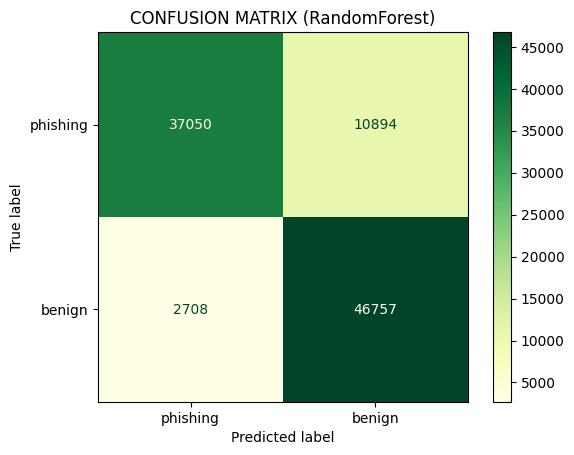


Classification Report:
              precision    recall  f1-score   support

    phishing       0.93      0.77      0.84     47944
      benign       0.81      0.95      0.87     49465

    accuracy                           0.86     97409
   macro avg       0.87      0.86      0.86     97409
weighted avg       0.87      0.86      0.86     97409

Accuracy (Test): 0.8604


In [ ]:
conf_matrix_RF(X_test2, Y_test2, RF, label_names=['phishing', 'benign'])

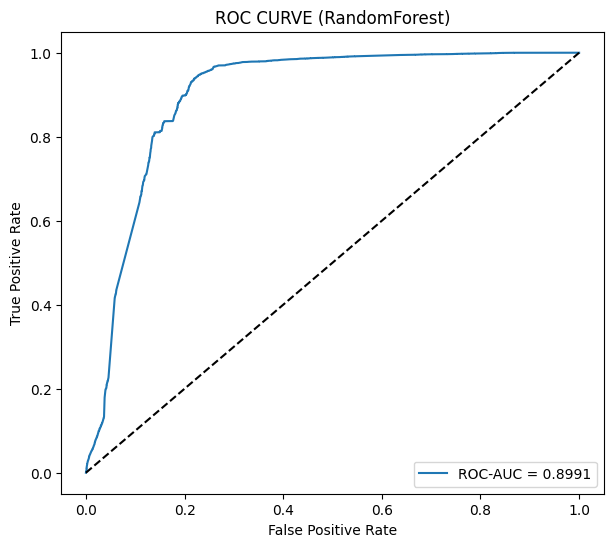

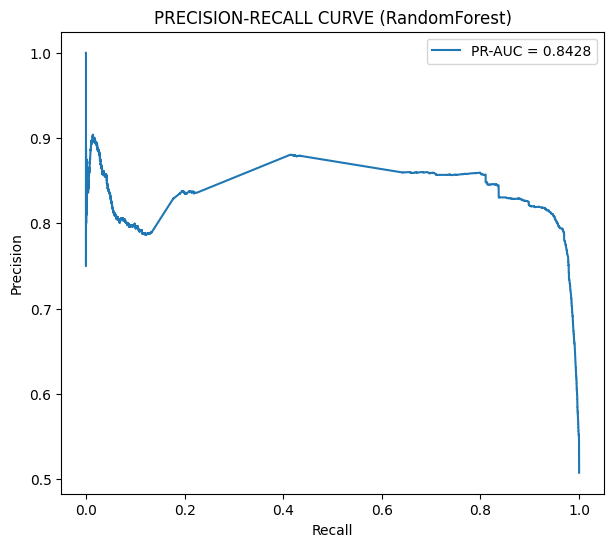

ROC-AUC (Test): 0.8991
PR-AUC  (Test): 0.8428


In [ ]:
pr_roc_RF(X_test2, Y_test2, RF)

In [ ]:
joblib.dump(RF, 'PhiUSIIL_RF_URL_Embedding.pkl')
!mv /content/PhiUSIIL_RF_URL_Embedding.pkl /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_RF_URL_Embedding.pkl

In [ ]:
result = predict_url_realtime_xgb("https://uis.ptithcm.edu.vn/", w2v_model, RF)

# Hiển thị kết quả
print("\nKết quả dự đoán:")
print(f"URL: {result['url']}")
print(f"Tokens: {result['tokens']}")
print(f"Nhãn dự đoán: {result['label']}")
print(f"Xác suất phishing: {result['probability_phishing']:.4f}")
print(f"Xác suất benign: {result['probability_benign']:.4f}")
print(f"Tổng xác suất: {result['probability_phishing'] + result['probability_benign']:.4f}")

Tokens: ['https', 'uis', 'ptithcm', 'edu', 'vn']

Kết quả dự đoán:
URL: https://uis.ptithcm.edu.vn/
Tokens: ['https', 'uis', 'ptithcm', 'edu', 'vn']
Nhãn dự đoán: Benign
Xác suất phishing: 0.1268
Xác suất benign: 0.8732
Tổng xác suất: 1.0000


# Random Forest Explaination Using SHAP (URL Embedding)

In [ ]:
import shap
import joblib
rf = joblib.load('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_RF_URL_Embedding.pkl')
explainer_rf = shap.TreeExplainer(
    rf,
    X_test2,
    feature_perturbation="interventional",
    model_output="probability"
)
shap_values_rf = explainer_rf.shap_values(X_test2)

In [ ]:
np.save("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_RF_URL_EMBEDDING_SHAP/shap_values_rf.npy", shap_values_rf)

In [ ]:
import shap
import joblib
rf = joblib.load('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_RF_URL_Embedding.pkl')
shap_values_rf = np.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_RF_URL_EMBEDDING_SHAP/shap_values_rf.npy")
explainer_rf = shap.TreeExplainer(
    rf,
    X_test2,
    feature_perturbation="interventional",
    model_output="probability"
)

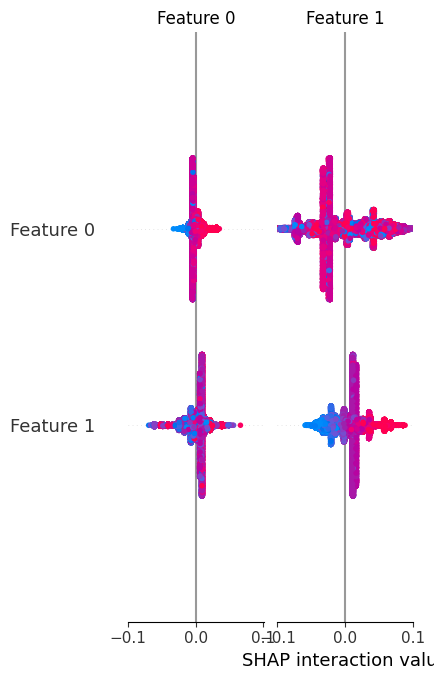

In [ ]:
shap.summary_plot(shap_values_rf, X_test2)

In [ ]:
print(Y_test2.iloc[256])

1


In [ ]:
shap.initjs()
shap.force_plot(
    float(explainer_rf.expected_value[1]),
    shap_values_rf[256, :, 1].astype('float64'),
    X_test2[256].astype('float64')
)

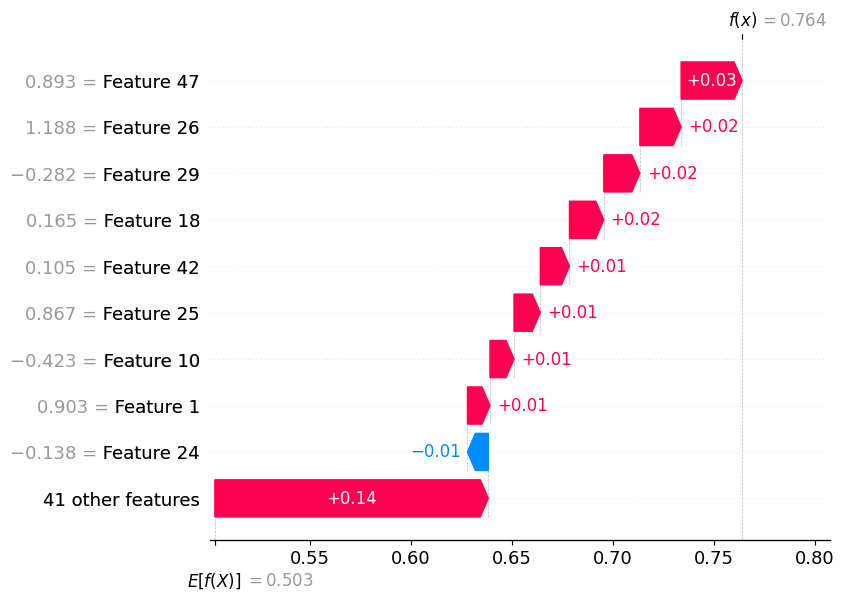

In [ ]:
shap.plots.waterfall(
    shap.Explanation(
        values = shap_values_rf[256, :, 1].astype('float64'),
        base_values = float(explainer_rf.expected_value[1]),
        data = X_test2[256].astype('float64'),
        feature_names = [f"Feature {i}" for i in range(X_test2.shape[1])]
    )
)

In [ ]:
print(Y_test2.iloc[68])

1


In [ ]:
from gensim.models import Word2Vec
import numpy as np

w2v = Word2Vec.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_URL2Vec.model")
tokens = list(w2v.wv.index_to_key)       # list token trong vocab
vectors = w2v.wv.vectors  # shape = (vocab_size, embedding_dim)

In [ ]:
def top_tokens_for_dim(dim, topn=10):
    """
    Trả về top token có giá trị embedding lớn nhất và nhỏ nhất tại chiều `dim`.
    """
    values = vectors[:, dim]
    sorted_idx = np.argsort(values)

    # top âm (nhỏ nhất)
    low_tokens = [(tokens[i], values[i]) for i in sorted_idx[:topn]]
    # top dương (lớn nhất)
    high_tokens = [(tokens[i], values[i]) for i in sorted_idx[-topn:]]

    return low_tokens, high_tokens

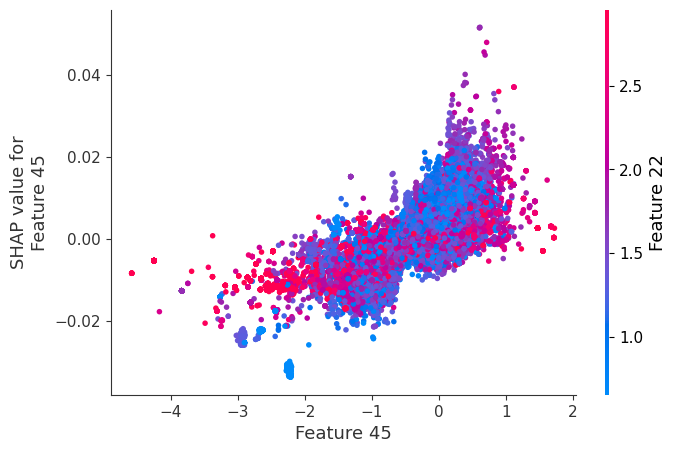

In [ ]:
shap_values_rf_class1 = shap_values_rf[:, :, 1]
shap.dependence_plot("Feature 45", shap_values_rf_class1, X_test2)

In [ ]:
low, high = top_tokens_for_dim(45, topn=10)

print("Chiều 45 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 45 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 45 - Top token kéo âm:
ly: -6.7414
bit: -5.9986
qrco: -5.8864
de: -5.6139
ead: -5.2062
dev: -5.1056
to: -4.5055
top: -4.4504
l: -4.4119
q-r: -4.1920

Chiều 45 - Top token kéo dương:
ac: 2.0771
linkedin: 2.0796
in: 2.2327
firebaseapp: 2.3796
mail: 2.4413
login.php: 2.5307
: 2.5594
deliverylifesupport: 2.5657
cmd=loginsubmit: 3.2080
public: 4.3335


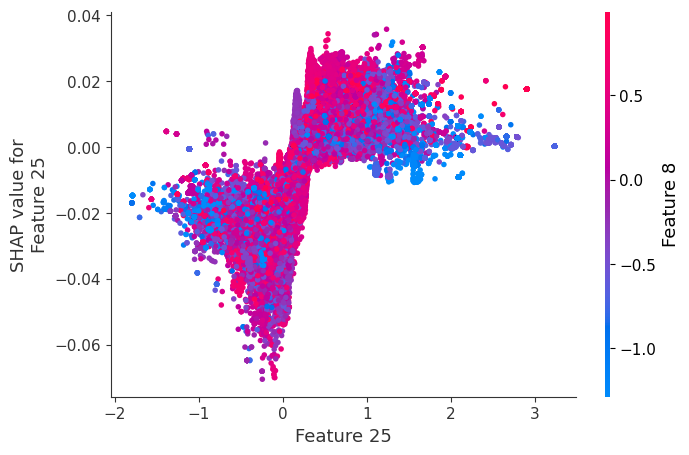

In [ ]:
shap.dependence_plot("Feature 25", shap_values_rf_class1, X_test2)

In [ ]:
low, high = top_tokens_for_dim(25, topn=10)

print("Chiều 25 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 25 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 25 - Top token kéo âm:
fi: -3.1419
dl=0: -2.4872
en: -2.4848
angelfire: -2.4314
wikipedia: -2.3937
me: -2.3723
view: -2.2586
images: -2.2531
us: -2.1881
c: -2.1765

Chiều 25 - Top token kéo dương:
weebly: 3.2343
weeblysite: 3.3324
webwave: 3.3522
bit: 3.4058
app: 3.5130
repl: 3.7079
br: 4.0561
dev: 4.2240
ly: 4.5220
workers: 4.6980


In [ ]:
print(Y_test2.iloc[44])

0


In [ ]:
shap.initjs()
shap.force_plot(
    float(explainer_rf.expected_value[0]),
    shap_values_rf[44, :, 1].astype('float64'),
    X_test2[44].astype('float64')
)

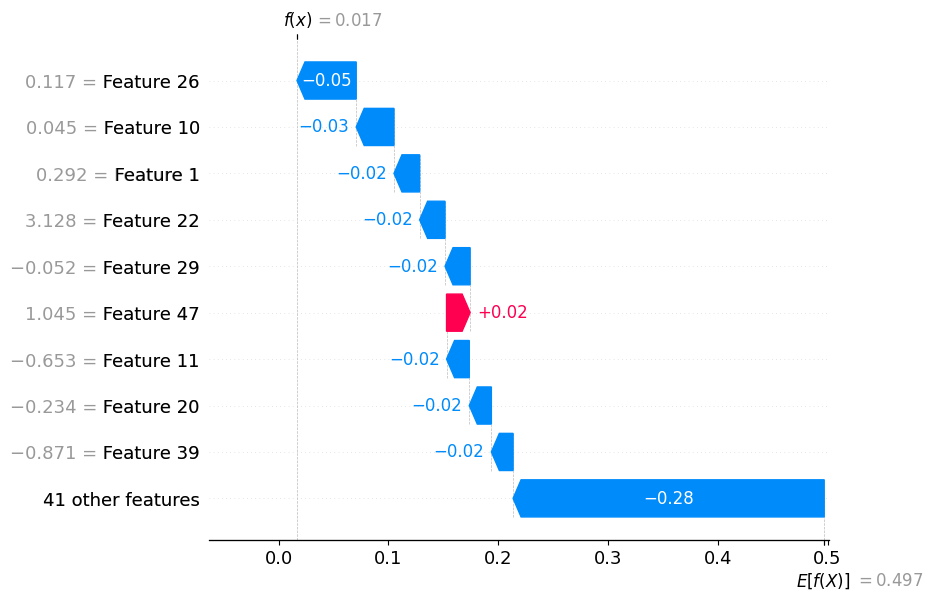

In [ ]:
shap.plots.waterfall(
    shap.Explanation(
        values = shap_values_rf[44, :, 1].astype('float64'),
        base_values = float(explainer_rf.expected_value[0]),
        data = X_test2[44].astype('float64'),
        feature_names = [f"Feature {i}" for i in range(X_test2.shape[1])]
    )
)

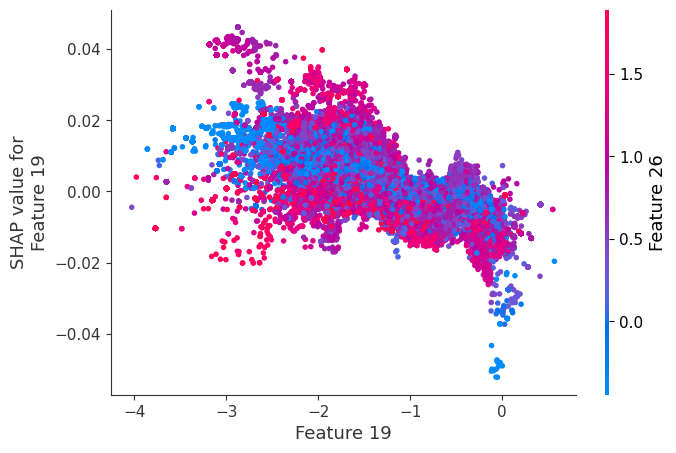

In [ ]:
shap_values_rf_class0 = shap_values_rf[:, :, 0]
shap.dependence_plot("Feature 19", shap_values_rf_class0, X_test2)

In [ ]:
low, high = top_tokens_for_dim(15, topn=10)

print("Chiều 19 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 19 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 19 - Top token kéo âm:
to: -2.3883
be: -2.2549
in: -2.0809
it: -2.0676
cloud: -1.9749
es: -1.9318
members: -1.8241
users: -1.5294
cl: -1.5113
tripod: -1.5039

Chiều 19 - Top token kéo dương:
story: 4.2342
ietf: 4.3254
shop: 4.4678
wikipedia: 4.5485
ai: 4.6471
tech: 4.6965
ly: 4.7452
news: 4.7671
allegrolokalnie: 4.9901
wiki: 5.7239


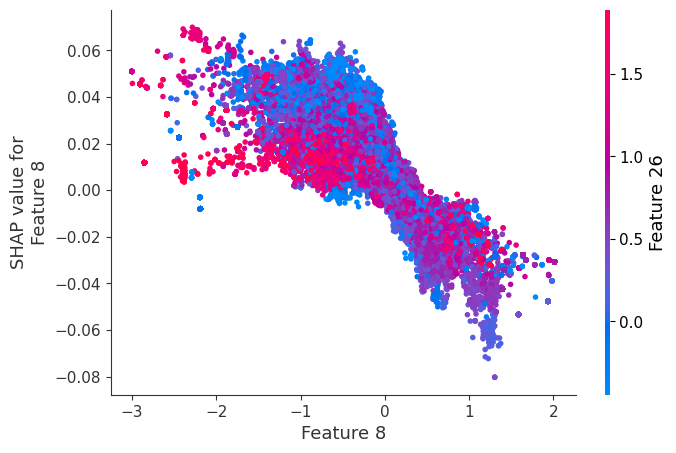

In [ ]:
shap.dependence_plot("Feature 8", shap_values_rf_class0, X_test2)

In [ ]:
low, high = top_tokens_for_dim(8, topn=10)

print("Chiều 75 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 75 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 75 - Top token kéo âm:
repl: -7.2330
blogspot: -5.1473
weebly: -4.9094
wiki: -4.8420
pantheonsite: -4.8050
wikipedia: -4.6855
firebaseapp: -4.1188
chase: -4.0863
github: -4.0594
webflow: -4.0444

Chiều 75 - Top token kéo dương:
page: 1.8322
home: 1.9662
p: 2.1234
nl: 2.2473
online: 2.4570
users: 2.5081
pl: 2.7711
gr: 2.7938
site: 2.8670
it: 2.9277


In [ ]:
print(Y_test2.iloc[150])

0


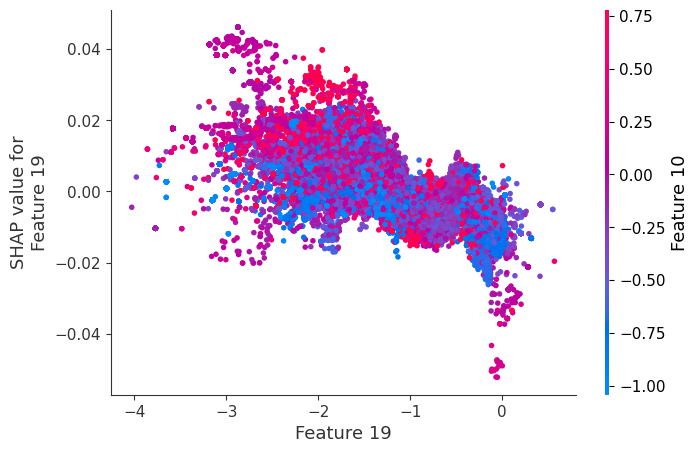

In [ ]:
shap.dependence_plot("Feature 19", shap_values_rf_class0, X_test2)

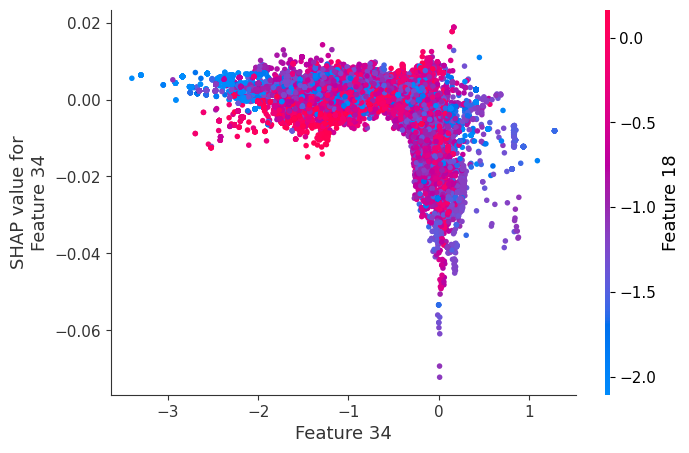

In [ ]:
shap.dependence_plot("Feature 34", shap_values_rf_class0, X_test2)

# Training & Evaluating KNN With URL-Embedding

In [ ]:
KNN.fit(X_train2, Y_train2)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
#import joblib
#KNN = joblib.load('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_KNN_URL_Embedding.pkl')

Accuracy: 0.8832346087117207


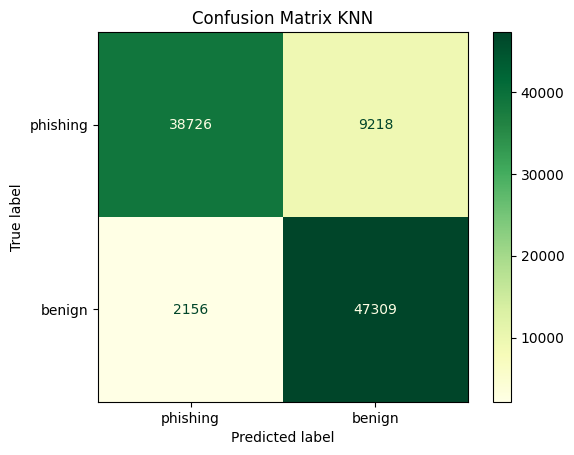

In [ ]:
conf_matrix_KNN_SVM(X_test2, Y_test2, KNN, "KNN", label_names=['phishing', 'benign'])

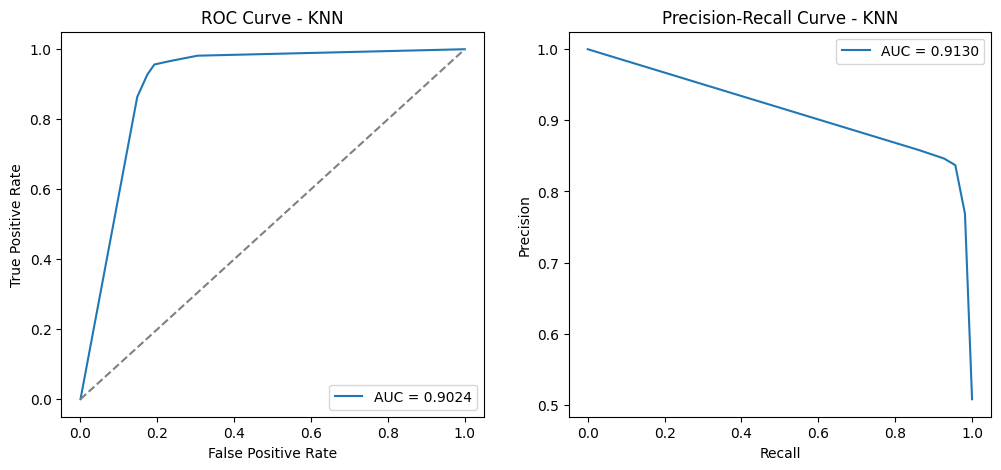

[KNN] ROC-AUC = 0.9024, PR-AUC = 0.9130


In [ ]:
pr_roc_KNN_SVM(X_test2, Y_test2, KNN, "KNN")

In [ ]:
joblib.dump(KNN, 'PhiUSIIL_KNN_URL_Embedding.pkl')
!mv /content/PhiUSIIL_KNN_URL_Embedding.pkl /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_KNN_URL_Embedding.pkl

# KNN Explaination Using LIEM (URL Embedding)

In [ ]:
!pip -q install lime

In [ ]:
import os, joblib, numpy as np, tensorflow as tf
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Class names
CLASS_NAMES = ['phishing', 'benign']  # 0=phishing, 1=benign

In [ ]:
def ensure_2d(arr3d):
    """(N, F, 1) -> (N, F) for LIME"""
    arr3d = np.asarray(arr3d)
    return np.squeeze(arr3d, axis=-1) if arr3d.ndim == 3 and arr3d.shape[-1] == 1 else arr3d

In [ ]:
def fallback_predict_proba_binary(model, X2d):
    """
    Trả về xác suất 2 lớp [p0, p1] cho binary classifier phi-proba.
    Ưu tiên predict_proba; nếu không có, dùng decision_function -> sigmoid.
    """
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X2d)
        # đảm bảo shape (N,2)
        if proba.shape[1] == 2:
            return proba
        # một số KNN hiếm trả (N,1)
        p1 = proba[:, -1]
        p0 = 1.0 - p1
        return np.stack([p0, p1], axis=1)
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X2d)
        # (N,) -> sigmoid; (N,2) -> softmax
        if scores.ndim == 1:
            p1 = 1.0 / (1.0 + np.exp(-scores))
            p0 = 1.0 - p1
            return np.stack([p0, p1], axis=1)
        else:
            exps = np.exp(scores - scores.max(axis=1, keepdims=True))
            prob = exps / exps.sum(axis=1, keepdims=True)
            return prob
    else:
        # fallback sang nhị phân theo ngưỡng 0.5 từ predict
        preds = model.predict(X2d).astype(int)
        p1 = preds.astype(float)
        p0 = 1.0 - p1
        return np.stack([p0, p1], axis=1)

In [ ]:
import numpy as np, joblib, os

In [ ]:

X_train4 = None; X_test4 = None; Y_train4 = None; Y_test4 = None

In [ ]:

if os.path.exists("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl"):
    X_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
    X_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
    Y_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
    Y_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")
else:
    # fallback
    X_train4 = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_train4.npy"))
    X_test4  = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_test4.npy"))
    Y_train4 = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train4.npy")
    Y_test4  = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test4.npy")


In [ ]:
X_train4 = np.asarray(X_train4, dtype=np.float32)
X_test4  = np.asarray(X_test4,  dtype=np.float32)

In [ ]:
# Nạp model KNN embedding , nếu không có thì dùng biến sẵn có
MODEL_PATH_KNN_EMB = "/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_KNN_URL_Embedding.pkl"
if os.path.exists(MODEL_PATH_KNN_EMB):
    knn_emb = joblib.load(MODEL_PATH_KNN_EMB)
else:
    assert 'knn_emb' in globals(), "Không tìm thấy KNN embedding đã train. Lưu model vào joblib hoặc giữ biến 'knn_emb' trong session."

In [ ]:
# LIME explainer
expl_knn_emb = LimeTabularExplainer(
    training_data=X_train4,
    feature_names=[f"emb{i}" for i in range(X_train4.shape[1])],
    class_names=CLASS_NAMES,
    discretize_continuous=True,
    mode='classification'
)


In [ ]:
def predict_proba_knn_emb(x2d):
    return fallback_predict_proba_binary(knn_emb, x2d)

In [ ]:
# Giải thích vài mẫu
for i in [0, 1, 2]:
    exp = expl_knn_emb.explain_instance(
        X_test4[i],
        predict_proba_knn_emb,
        num_features=15,
        top_labels=2
    )
    print(f"[KNN-EMB] Sample {i} -> top contributions for label=1 (benign):")
    print(exp.as_list(label=1))

[KNN-EMB] Sample 0 -> top contributions for label=1 (benign):
[('emb46 <= -0.99', 0.1056850365099051), ('emb40 <= -0.55', 0.05486296058550115), ('emb17 > 0.61', 0.05048738982465618), ('emb21 > 1.12', 0.04974494385173756), ('emb29 <= -0.22', -0.042789439519496944), ('emb18 > -0.21', 0.04233417594694415), ('emb16 <= 0.12', 0.03859412868953786), ('emb27 > 1.26', 0.03549492120431552), ('emb30 <= -0.96', 0.032855031195216516), ('emb48 > 0.67', -0.03072587868634685), ('-0.17 < emb28 <= -0.07', 0.0290823707536205), ('-0.39 < emb11 <= -0.05', 0.021342074142315055), ('emb39 > 0.53', -0.02065181600181007), ('emb32 > 0.91', 0.02051826133637129), ('-0.40 < emb33 <= -0.08', 0.019321177931003207)]
[KNN-EMB] Sample 1 -> top contributions for label=1 (benign):
[('emb46 <= -0.99', 0.13097249143079528), ('emb42 <= -0.35', -0.07925481854493395), ('emb9 <= -0.27', -0.054407705979275536), ('emb30 <= -0.96', 0.04330884942398563), ('emb48 > 0.67', -0.03994489983285676), ('emb0 <= -0.64', -0.03121752929792576

In [ ]:
# ==== VẼ BIỂU ĐỒ LIME THEO TỪNG MẪU (KNN-Embedding) ====
import matplotlib.pyplot as plt
import numpy as np
import os

# Thư mục lưu hình
OUT_DIR = "/content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_KNN_EMB"
os.makedirs(OUT_DIR, exist_ok=True)

In [ ]:
def lime_barplot(exp, label=1, title="KNN-EMB – LIME per-sample", savepath=None):
    """
    Vẽ biểu đồ thanh ngang từ exp.as_list(label=...).
    - exp: đối tượng LIME Explanation đã tính cho 1 mẫu
    - label: lớp cần hiển thị (1 = benign theo mapping của bạn)
    - title: tiêu đề biểu đồ
    - savepath: đường dẫn .png để lưu (nếu None thì chỉ hiển thị)
    """
    pairs = exp.as_list(label=label)  # [(rule, weight), ...]
    if not pairs:
        print("[WARN] Không có rule nào để vẽ.")
        return

    # Sắp xếp theo độ lớn tuyệt đối để dễ nhìn (top trước)
    rules, weights = zip(*pairs)
    order = np.argsort(np.abs(weights))[::-1]
    rules  = [rules[i] for i in order]
    weights = [weights[i] for i in order]

    # Vẽ barh
    plt.figure(figsize=(8, 5))
    y = list(range(len(rules)))[::-1]             # đảo để rule mạnh nhất ở dưới cùng
    w = list(weights)[::-1]
    r = list(rules)[::-1]
    plt.barh(y, w)                                # KHÔNG set màu theo yêu cầu
    plt.yticks(y, r)
    plt.xlabel("LIME contribution (±)")
    plt.title(title)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
        print("[Saved]", savepath)
    else:
        plt.show()

# === Ví dụ: vẽ cho 3 mẫu đầu (giống đoạn bạn in console)
sample_ids = [0, 1, 2]
for i in sample_ids:
    exp = expl_knn_emb.explain_instance(
        X_test4[i],
        predict_proba_knn_emb,
        num_features=15,
        top_labels=2
    )
    png_path = os.path.join(OUT_DIR, f"LIME_KNN_EMB_sample_{i}.png")
    lime_barplot(
        exp, label=1,
        title=f"KNN-EMB – Sample {i} (label=1 benign)",
        savepath=png_path
    )

print("Xong! Ảnh lưu tại:", OUT_DIR)


[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_KNN_EMB/LIME_KNN_EMB_sample_0.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_KNN_EMB/LIME_KNN_EMB_sample_1.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_KNN_EMB/LIME_KNN_EMB_sample_2.png
Xong! Ảnh lưu tại: /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_KNN_EMB


# Training & Evaluating SVM With URL-Embedding

In [ ]:
SVM.fit(X_train2, Y_train2)

In [ ]:
#import joblib
#SVM = joblib.load('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_SVM_URL_Embedding.pkl')

Accuracy: 0.980252804710899


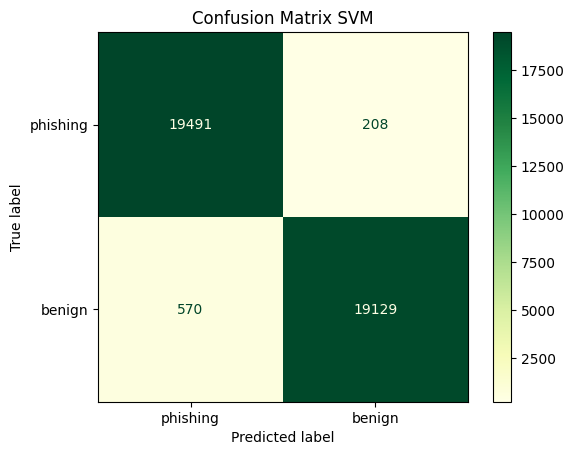

In [ ]:
conf_matrix_KNN_SVM(X_test2, Y_test2, SVM, "SVM", label_names=['phishing', 'benign'])

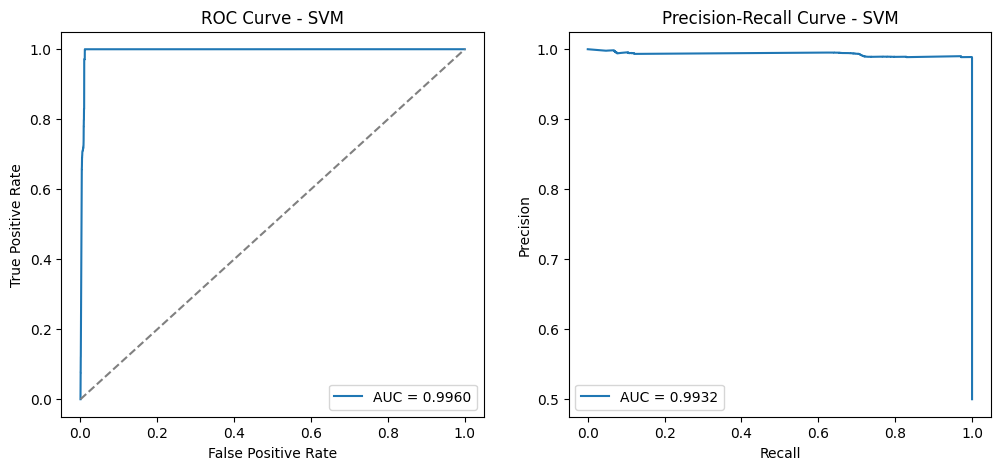

[SVM] ROC-AUC = 0.9960, PR-AUC = 0.9932


In [ ]:
pr_roc_KNN_SVM(X_test2, Y_test2, SVM, "SVM")

In [ ]:
joblib.dump(SVM, 'PhiUSIIL_SVM_URL_Embedding.pkl')
!mv /content/PhiUSIIL_SVM_URL_Embedding.pkl /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_SVM_URL_Embedding.pkl

#SVM Explaination Using LIEM (URL Embedding)

In [ ]:

import numpy as np, joblib, os

In [ ]:

if 'X_train4' not in globals():
    if os.path.exists("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl"):
        X_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
        X_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
        Y_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
        Y_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")
    else:
        X_train4 = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_train4.npy"))
        X_test4  = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_test4.npy"))
        Y_train4 = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train4.npy")
        Y_test4  = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test4.npy")

In [ ]:
X_train4 = np.asarray(X_train4, dtype=np.float32)
X_test4  = np.asarray(X_test4,  dtype=np.float32)

In [ ]:
# Nạp model SVM embedding
MODEL_PATH_SVM_EMB = "/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_SVM_URL_Embedding.pkl"
if os.path.exists(MODEL_PATH_SVM_EMB):
    svm_emb = joblib.load(MODEL_PATH_SVM_EMB)
else:
    assert 'svm_emb' in globals(), "Không tìm thấy SVM embedding đã train. Lưu model vào joblib hoặc giữ biến 'svm_emb' trong session."


In [ ]:
# LIME explainer
expl_svm_emb = LimeTabularExplainer(
    training_data=X_train4,
    feature_names=[f"emb{i}" for i in range(X_train4.shape[1])],
    class_names=CLASS_NAMES,
    discretize_continuous=True,
    mode='classification'
)

In [ ]:

def predict_proba_svm_emb(x2d):
    return fallback_predict_proba_binary(svm_emb, x2d)

In [ ]:
# Giải thích vài mẫu
for i in [0, 1, 2]:
    exp = expl_svm_emb.explain_instance(
        X_test4[i],
        predict_proba_svm_emb,
        num_features=15,
        top_labels=2
    )
    print(f"[SVM-EMB] Sample {i} -> top contributions for label=1 (benign):")
    print(exp.as_list(label=1))

[SVM-EMB] Sample 0 -> top contributions for label=1 (benign):
[('emb84 > -0.00', 0.028145537376879266), ('emb35 > 0.45', 0.020043220848672143), ('emb75 > 0.57', 0.019501354059189922), ('emb33 <= -0.98', 0.017014566933485503), ('emb8 <= -0.77', 0.016130996843884297), ('emb79 <= -0.17', 0.015462870674899105), ('emb42 > -0.49', -0.01503247112110843), ('emb28 > -0.34', -0.01404427724344739), ('emb66 <= 0.39', -0.01380692251936922), ('emb90 > 0.34', -0.013692292190705904), ('emb71 > 0.58', -0.01299576874127749), ('emb41 <= -0.34', -0.012817980828878793), ('emb98 > 0.19', 0.01269067147511688), ('emb13 > 0.41', -0.012276658661746275), ('emb44 > 0.04', -0.010850725182818143)]
[SVM-EMB] Sample 1 -> top contributions for label=1 (benign):
[('emb95 > 0.80', 0.018303990282601174), ('emb42 <= -0.88', 0.016743489356437363), ('emb75 > 0.57', 0.014900352875612081), ('emb90 <= -0.16', 0.013367061070619645), ('emb28 <= -0.72', 0.012627088887113728), ('emb44 <= -0.20', 0.01256937079389413), ('0.06 < emb7

In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt

# Thư mục lưu ảnh
OUT_DIR = "/content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_SVM_EMB"
os.makedirs(OUT_DIR, exist_ok=True)

In [ ]:
def lime_barplot(exp, label=1, title="SVM-EMB – LIME per-sample", savepath=None):
    """
    Vẽ biểu đồ thanh ngang từ exp.as_list(label=...).
    - label=1 (benign) theo mapping 0=phish, 1=benign.
    """
    pairs = exp.as_list(label=label)
    if not pairs:
        print("[WARN] Không có rule để vẽ.")
        return

    # Sắp xếp theo |weight| giảm dần
    rules, weights = zip(*pairs)
    order = np.argsort(np.abs(weights))[::-1]
    rules   = [rules[i] for i in order]
    weights = [weights[i] for i in order]

    # Vẽ barh (mỗi mẫu 1 chart)
    plt.figure(figsize=(8, 5))
    y = list(range(len(rules)))[::-1]     # đảo để mục quan trọng nhất ở dưới cùng
    w = list(weights)[::-1]
    r = list(rules)[::-1]
    plt.barh(y, w)
    plt.yticks(y, r)
    plt.xlabel("LIME contribution (±)")
    plt.title(title)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
        print("[Saved]", savepath)
    else:
        plt.show()

# === Vẽ cho vài mẫu ví dụ (0,1,2) ===
sample_ids = [0, 1, 2]
for i in sample_ids:
    exp = expl_svm_emb.explain_instance(
        X_test4[i],
        predict_proba_svm_emb,
        num_features=15,
        top_labels=2
    )
    png_path = os.path.join(OUT_DIR, f"LIME_SVM_EMB_sample_{i}.png")
    lime_barplot(
        exp, label=1,
        title=f"SVM-EMB – Sample {i} (label=1 benign)",
        savepath=png_path
    )

print("Xong! Ảnh lưu tại:", OUT_DIR)


[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_SVM_EMB/LIME_SVM_EMB_sample_0.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_SVM_EMB/LIME_SVM_EMB_sample_1.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_SVM_EMB/LIME_SVM_EMB_sample_2.png
Xong! Ảnh lưu tại: /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_SVM_EMB


# Prepare Train/Test For BiLSTM/CNN/CNN-LSTM (URL Embedding)

In [ ]:
import joblib
X_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
X_test4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
Y_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
Y_test4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")
X_train4 = np.expand_dims(X_train4, axis=-1)
X_test4 = np.expand_dims(X_test4, axis=-1)
print(X_train4.shape, Y_train4.shape)

(389635, 50, 1) (389635,)


# Training & Evaluation BiLSTM With URL-Embedding

In [ ]:
import tensorflow as tf
BiLSTM_model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(curve='PR', name="pr_auc")
    ]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'PhiUSIIL_BiLSTM_URL_Embedding.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1
    )
]

BiLSTM_results_2 = BiLSTM_model2.fit(
    X_train4, Y_train4,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=callbacks
)

Epoch 1/200
2435/2436 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7803 - loss: 0.4484 - pr_auc: 0.8562 - precision: 0.7654 - recall: 0.8238
Epoch 1: val_loss improved from inf to 0.30181, saving model to PhiUSIIL_BiLSTM_URL_Embedding.keras
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 48s 18ms/step - accuracy: 0.7804 - loss: 0.4484 - pr_auc: 0.8563 - precision: 0.7654 - recall: 0.8238 - val_accuracy: 0.8739 - val_loss: 0.3018 - val_pr_auc: 0.9414 - val_precision: 0.8789 - val_recall: 0.8702
Epoch 2/200
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8803 - loss: 0.2910 - pr_auc: 0.9421 - precision: 0.8677 - recall: 0.9015
Epoch 2: val_loss improved from 0.30181 to 0.25788, saving model to PhiUSIIL_BiLSTM_URL_Embedding.keras
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 80s 17ms/step - accuracy: 0.8803 - loss: 0.2910 - pr_auc: 0.9421 - precision: 0.8677 - recall: 0.9015 - val_accuracy: 0.8968 - val_loss: 0.2579 - val_pr_auc: 0.9540 - val_precision: 0.8714 - val_recall: 0.9334
Epoch 3/200
2436/2436 ━━━━

In [ ]:
!mv /content/PhiUSIIL_BiLSTM_URL_Embedding.keras /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_BiLSTM_URL_Embedding.keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
BiLSTM_results_2 = tf.keras.models.load_model(
    "/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_BiLSTM_URL_Embedding.keras"
)

test_loss, test_acc, test_prec, test_rec, test_pr_auc = BiLSTM_results_2.evaluate(X_test4, Y_test4)
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"PR AUC: {test_pr_auc:.4f}")


3045/3045 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.8339 - loss: 0.6973 - pr_auc: 0.8458 - precision: 0.7729 - recall: 0.9540
Loss: 0.7075
Accuracy: 0.8326
Precision: 0.7716
Recall: 0.9522
PR AUC: 0.8409


In [ ]:
eval_graph_CNN(BiLSTM_results_2)

AttributeError: 'Sequential' object has no attribute 'history'

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step


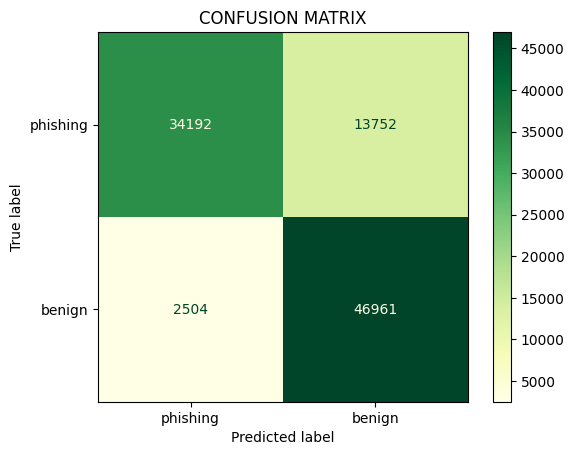

F1-Score: 0.8525


In [ ]:
conf_matrix_CNN(X_test4, Y_test4, BiLSTM_model2, label_names=['phishing', 'benign'])

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step


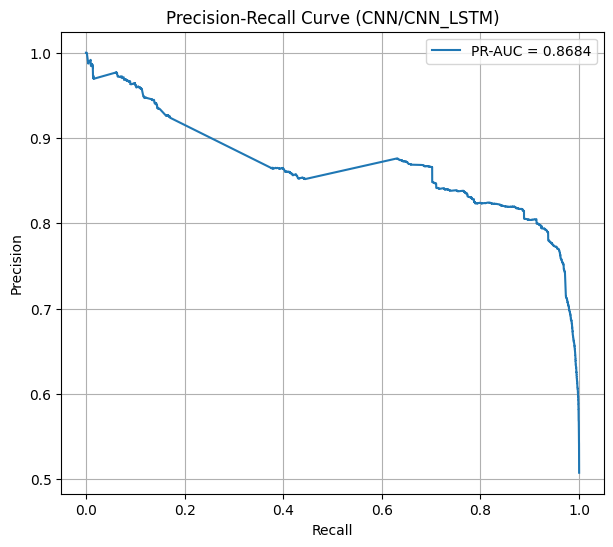

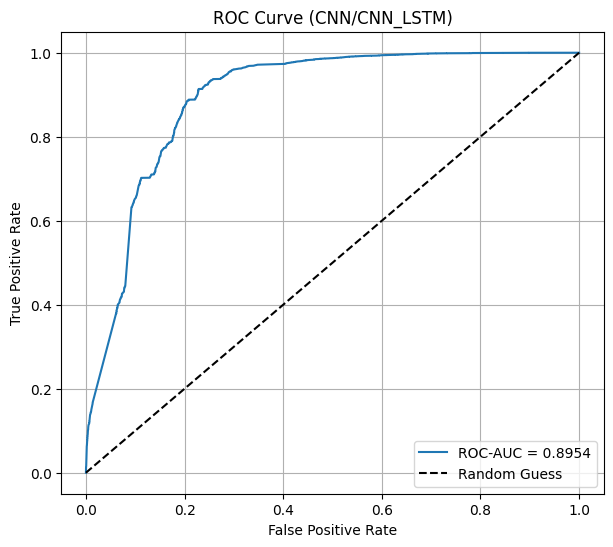

PR-AUC : 0.8684
ROC-AUC: 0.8954


(np.float64(0.8683581612899974), np.float64(0.895396467000847))

In [ ]:
pr_roc_CNN(X_test4, Y_test4, BiLSTM_model2)

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from urllib.parse import urlparse
import re
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Tiền xử lý URL tương tự ---
def preprocess_url(url):
    url = url.decode('utf-8') if isinstance(url, bytes) else url
    url = url.lower()
    parsed = urlparse(url)
    tokens = []
    if parsed.scheme:
        tokens.append(parsed.scheme)
    domain_parts = parsed.netloc.split('.')
    tokens.extend(domain_parts)
    if parsed.path:
        path_parts = [p for p in parsed.path.split('/') if p]
        tokens.extend(path_parts)
    if parsed.query:
        query_parts = parsed.query.split('&')
        tokens.extend(query_parts)
    tokens = [re.sub(r'[^a-z0-9\-\/.=]', '', token) for token in tokens if token]
    return tokens


# --- Tạo vector chuỗi cho CNN ---
def Url2Vec(tokens, w2v_model, embedding_dim=50):
    vectors = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

# --- Load mô hình ---
w2v_model = Word2Vec.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_URL2Vec.model")

# --- Hàm dự đoán realtime ---
def predict_url_realtime_keras(url, w2v_model, keras_model, embedding_dim=50):
    # 1️⃣ Tiền xử lý URL
    tokens = preprocess_url(url)
    print("Tokens:", tokens)

    # 2️⃣ Tạo vector embedding
    url_vector = Url2Vec(tokens, w2v_model, embedding_dim)

    # 3️⃣ Reshape 3D cho BiLSTM/CNN
    url_vector = url_vector.reshape(1, embedding_dim, 1)

    # 4️⃣ Dự đoán
    proba = keras_model.predict(url_vector)[0]

    # 5️⃣ Kiểm tra kiểu đầu ra
    if len(proba) == 1:
        # Mô hình sigmoid (1 output neuron)
        p_benign = float(proba[0])        # vì model output=1 -> class=1 (benign)
        p_phishing = 1 - p_benign
        label = "Benign" if p_benign >= 0.5 else "Phishing"
    else:
        # Mô hình softmax (2 output neurons)
        # giả định: output[0] = phish (class 0), output[1] = benign (class 1)
        p_phishing = float(proba[0])
        p_benign = float(proba[1])
        label = "Benign" if np.argmax(proba) == 1 else "Phishing"

    return {
        "url": url,
        "tokens": tokens,
        "embedding_shape": url_vector.shape,
        "label": label,
        "probability_phishing": p_phishing,
        "probability_benign": p_benign
    }

In [ ]:
bilstm_model = load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_BiLSTM_URL_Embedding.keras")
result = predict_url_realtime_keras(
    "https://www.flexclip.com/",
    w2v_model,
    bilstm_model,
    embedding_dim=50
)
result

Tokens: ['https', 'www', 'flexclip', 'com']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


{'url': 'https://www.flexclip.com/',
 'tokens': ['https', 'www', 'flexclip', 'com'],
 'embedding_shape': (1, 50, 1),
 'label': 'Benign',
 'probability_phishing': 0.0051517486572265625,
 'probability_benign': 0.9948482513427734}

# BiLSTM Explaination Using LIEM (URL Embedding)

In [ ]:

import os, numpy as np, keras

In [ ]:
# Dữ liệu embedding 2D cho LIME
if 'X_train4' not in globals():
    if os.path.exists("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl"):
        X_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
        X_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
        Y_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
        Y_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")
    else:
        X_train4 = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_train4.npy"))
        X_test4  = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_test4.npy"))
        Y_train4 = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train4.npy")
        Y_test4  = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test4.npy")


In [ ]:
X_train4 = np.asarray(X_train4, dtype=np.float32)
X_test4  = np.asarray(X_test4,  dtype=np.float32)

In [ ]:
CANDIDATE_BILSTM_EMB = [
    "/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_BiLSTM_URL_Embedding.keras",
    "/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_BiLSTM_Embedding.keras",
    "/content/drive/MyDrive/DeAnTotNghiep/BiLSTM_URL_Embedding.keras"
]

In [ ]:
bilstm_emb_model = None
for p in CANDIDATE_BILSTM_EMB:
    if os.path.exists(p):
        try:
            bilstm_emb_model = keras.saving.load_model(p, compile=False, safe_mode=False)
            print(f"[OK] Loaded Keras3 model: {p}")
            break
        except Exception as e:
            print(f"[WARN] load_model failed on {p}: {e}")

if bilstm_emb_model is None:
    # fallback: dùng biến đã có trong session
    assert 'BiLSTM_model2' in globals(), \
        "Không có file .keras và cũng không có BiLSTM_model2 trong session."
    bilstm_emb_model = BiLSTM_model2
    print("[OK] Using in-memory BiLSTM_model2")

# Warm-up 1 lần bằng numpy để chắc chắn model đã build
_ = bilstm_emb_model(np.zeros((1, 50, 1), dtype=np.float32))
print("[OK] Warmed up BiLSTM embedding.")

[OK] Loaded Keras3 model: /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_BiLSTM_URL_Embedding.keras
[OK] Warmed up BiLSTM embedding.


In [ ]:
def predict_proba_bilstm_emb(x2d):
    # x2d: (N,100)  ->  (N,100,1)
    x3d = np.expand_dims(x2d.astype(np.float32), axis=-1)
    y = bilstm_emb_model(x3d, training=False)
    # Keras 3 trả về EagerTensor; lấy numpy nếu cần
    try:
        y = y.numpy()
    except AttributeError:
        pass
    p1 = y.reshape(-1)
    p0 = 1.0 - p1
    return np.stack([p0, p1], axis=1)


In [ ]:
!pip -q install lime

In [ ]:
import os, joblib, numpy as np, tensorflow as tf
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Class names
CLASS_NAMES = ['phishing', 'benign']  # 0=phishing, 1=benign

In [ ]:
def ensure_2d(arr3d):
    """(N, F, 1) -> (N, F) for LIME"""
    arr3d = np.asarray(arr3d)
    return np.squeeze(arr3d, axis=-1) if arr3d.ndim == 3 and arr3d.shape[-1] == 1 else arr3d

In [ ]:
def fallback_predict_proba_binary(model, X2d):
    """
    Trả về xác suất 2 lớp [p0, p1] cho binary classifier phi-proba.
    Ưu tiên predict_proba; nếu không có, dùng decision_function -> sigmoid.
    """
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X2d)
        # đảm bảo shape (N,2)
        if proba.shape[1] == 2:
            return proba
        # một số KNN hiếm trả (N,1)
        p1 = proba[:, -1]
        p0 = 1.0 - p1
        return np.stack([p0, p1], axis=1)
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X2d)
        # (N,) -> sigmoid; (N,2) -> softmax
        if scores.ndim == 1:
            p1 = 1.0 / (1.0 + np.exp(-scores))
            p0 = 1.0 - p1
            return np.stack([p0, p1], axis=1)
        else:
            exps = np.exp(scores - scores.max(axis=1, keepdims=True))
            prob = exps / exps.sum(axis=1, keepdims=True)
            return prob
    else:
        # fallback sang nhị phân theo ngưỡng 0.5 từ predict
        preds = model.predict(X2d).astype(int)
        p1 = preds.astype(float)
        p0 = 1.0 - p1
        return np.stack([p0, p1], axis=1)

In [ ]:

if os.path.exists("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl"):
    X_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
    X_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
    Y_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
    Y_test4  = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")
else:
    # fallback
    X_train4 = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_train4.npy"))
    X_test4  = ensure_2d(np.load("/content/drive/MyDrive/DeAnTotNghiep/X_test4.npy"))
    Y_train4 = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train4.npy")
    Y_test4  = np.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test4.npy")


In [ ]:
X_train4 = np.asarray(X_train4, dtype=np.float32)
X_test4  = np.asarray(X_test4,  dtype=np.float32)

In [ ]:
expl_bilstm_emb = LimeTabularExplainer(
    training_data=X_train4,
    feature_names=[f"emb{i}" for i in range(X_train4.shape[1])],
    class_names=CLASS_NAMES,
    discretize_continuous=True,
    mode='classification'
)

In [ ]:
# Giải thích vài mẫu
for i in [0, 1, 2]:
    exp = expl_bilstm_emb.explain_instance(
        X_test4[i],
        predict_proba_bilstm_emb,
        num_features=15,
        top_labels=2
    )
    print(f"[BiLSTM-EMB] Sample {i} -> top contributions for label=1 (benign):")
    print(exp.as_list(label=1))

[BiLSTM-EMB] Sample 0 -> top contributions for label=1 (benign):
[('emb46 <= -0.99', 0.14439541326413705), ('emb27 > 1.26', 0.09457587841084056), ('emb48 > 0.67', -0.08506919920018896), ('emb21 > 1.12', 0.08150747617638536), ('-0.55 < emb47 <= -0.15', -0.05540813191980712), ('-0.39 < emb11 <= -0.05', 0.04753080021431471), ('emb4 > 0.37', 0.04623152059553183), ('emb45 > 0.61', -0.04595026818729723), ('emb2 > 0.20', 0.04276552371262127), ('-0.64 < emb0 <= -0.35', -0.03955084791566781), ('emb6 > 0.99', 0.036543247047346905), ('emb20 > 0.97', 0.03274480168637854), ('0.23 < emb36 <= 0.78', 0.03182675588503675), ('emb38 <= -0.50', 0.030368344406026867), ('emb16 <= 0.12', 0.025499595169392805)]
[BiLSTM-EMB] Sample 1 -> top contributions for label=1 (benign):
[('emb46 <= -0.99', 0.13920236705308806), ('emb9 <= -0.27', -0.12401127867792261), ('emb27 > 1.26', 0.10152579065857212), ('emb0 <= -0.64', -0.09939607542531145), ('emb11 > -0.05', 0.08613731088916432), ('emb48 > 0.67', -0.066221200730509

In [ ]:
# ==== VẼ BIỂU ĐỒ LIME THEO TỪNG MẪU (BiLSTM – Embedding 100×1) ====
import os
import numpy as np
import matplotlib.pyplot as plt

# Thư mục lưu ảnh
OUT_DIR = "/content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_BILSTM_EMB"
os.makedirs(OUT_DIR, exist_ok=True)

In [ ]:
def lime_barplot(exp, label=1, title="BiLSTM-EMB – LIME per-sample", savepath=None):
    """
    Vẽ biểu đồ thanh ngang từ exp.as_list(label=...).
    - label=1 (benign) theo mapping 0=phish, 1=benign.
    """
    pairs = exp.as_list(label=label)
    if not pairs:
        print("[WARN] Không có rule để vẽ.")
        return

    # Sắp xếp theo |weight| giảm dần
    rules, weights = zip(*pairs)
    order = np.argsort(np.abs(weights))[::-1]
    rules   = [rules[i] for i in order]
    weights = [weights[i] for i in order]

    # Vẽ barh (mỗi mẫu 1 chart)
    plt.figure(figsize=(8, 5))
    y = list(range(len(rules)))[::-1]
    w = list(weights)[::-1]
    r = list(rules)[::-1]
    plt.barh(y, w)
    plt.yticks(y, r)
    plt.xlabel("LIME contribution (±)")
    plt.title(title)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
        print("[Saved]", savepath)
    else:
        plt.show()

# === Vẽ cho vài mẫu ví dụ (0,1,2) ===
sample_ids = [0, 1, 2]
for i in sample_ids:
    exp = expl_bilstm_emb.explain_instance(
        X_test4[i],
        predict_proba_bilstm_emb,
        num_features=15,
        top_labels=2
    )
    png_path = os.path.join(OUT_DIR, f"LIME_BILSTM_EMB_sample_{i}.png")
    lime_barplot(
        exp, label=1,
        title=f"BiLSTM-EMB – Sample {i} (label=1 benign)",
        savepath=png_path
    )

print("Xong! Ảnh lưu tại:", OUT_DIR)


[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_BILSTM_EMB/LIME_BILSTM_EMB_sample_0.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_BILSTM_EMB/LIME_BILSTM_EMB_sample_1.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_BILSTM_EMB/LIME_BILSTM_EMB_sample_2.png
Xong! Ảnh lưu tại: /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_BILSTM_EMB


# Training & Evaluation CNN With URL-Embedding

In [ ]:
import tensorflow as tf
CNN_model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(curve='PR', name="pr_auc")
    ]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'PhiUSIIL_CNN_URL_Embedding.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=15,
        verbose=1
    )
]

CNN_results_2 = CNN_model2.fit(
    X_train4, Y_train4,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=callbacks
)

Epoch 1/200
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8545 - loss: 0.3434 - pr_auc: 0.9156 - precision: 0.8379 - recall: 0.8868
Epoch 1: val_loss improved from inf to 0.23876, saving model to PhiUSIIL_CNN_URL_Embedding.keras
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.8545 - loss: 0.3434 - pr_auc: 0.9156 - precision: 0.8379 - recall: 0.8869 - val_accuracy: 0.9072 - val_loss: 0.2388 - val_pr_auc: 0.9568 - val_precision: 0.8864 - val_recall: 0.9362
Epoch 2/200
2428/2436 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9002 - loss: 0.2558 - pr_auc: 0.9527 - precision: 0.8808 - recall: 0.9298
Epoch 2: val_loss improved from 0.23876 to 0.22142, saving model to PhiUSIIL_CNN_URL_Embedding.keras
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9002 - loss: 0.2558 - pr_auc: 0.9527 - precision: 0.8808 - recall: 0.9299 - val_accuracy: 0.9145 - val_loss: 0.2214 - val_pr_auc: 0.9629 - val_precision: 0.8872 - val_recall: 0.9517
Epoch 3/200
2428/2436 ━━━━━━━━━━━━━━

In [ ]:
#CNN_results_2 = tf.keras.models.load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_Embedding.keras")

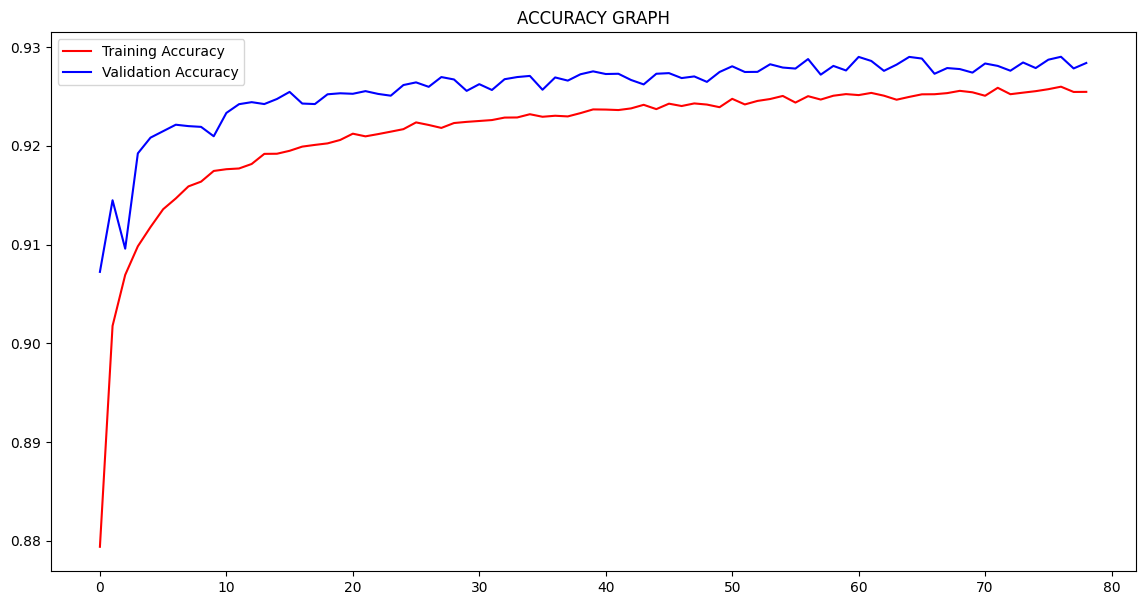

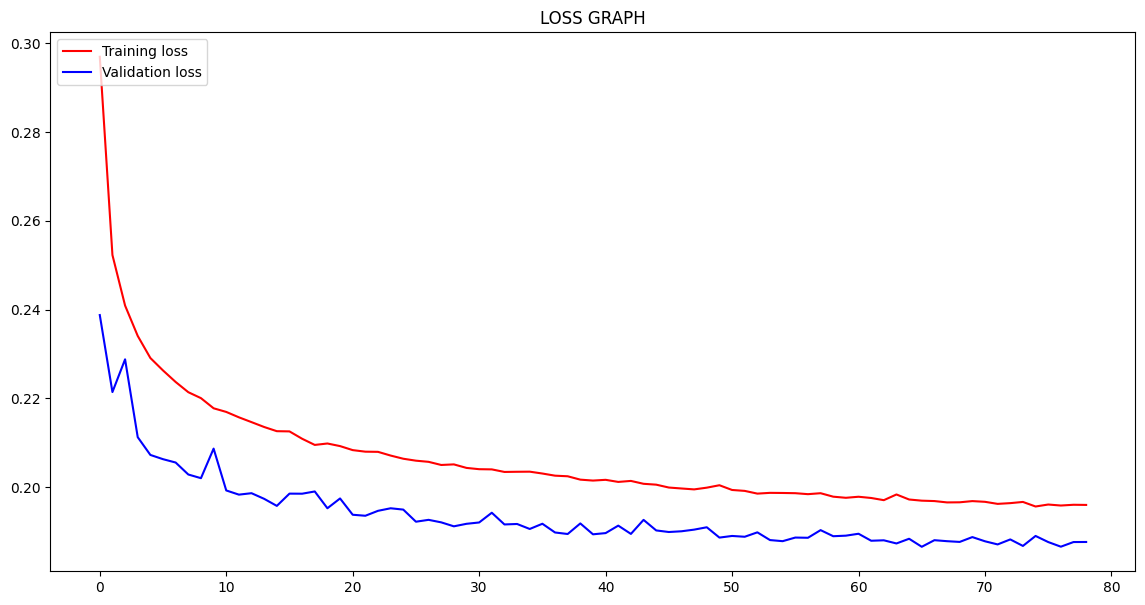

In [ ]:
eval_graph_CNN(CNN_results_2)

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


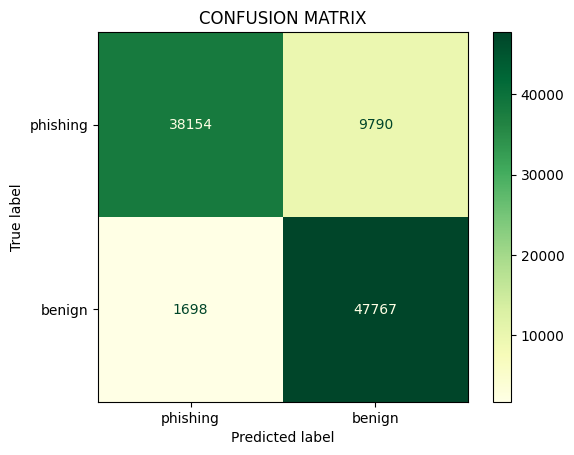

F1-Score: 0.8927


In [ ]:
conf_matrix_CNN(X_test4, Y_test4, CNN_model2, label_names=['phishing', 'benign'])

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


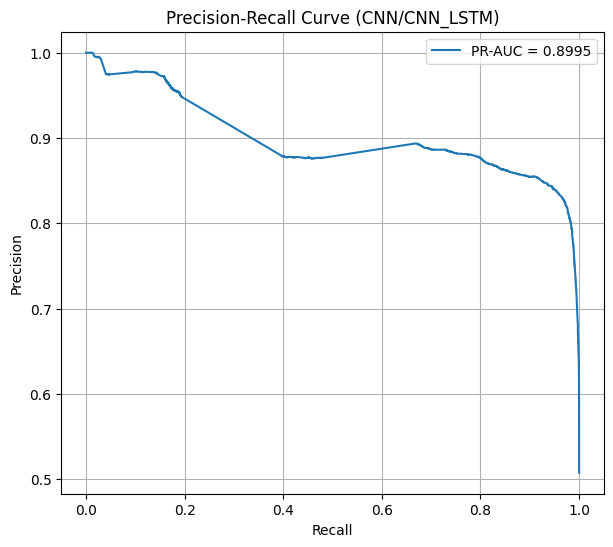

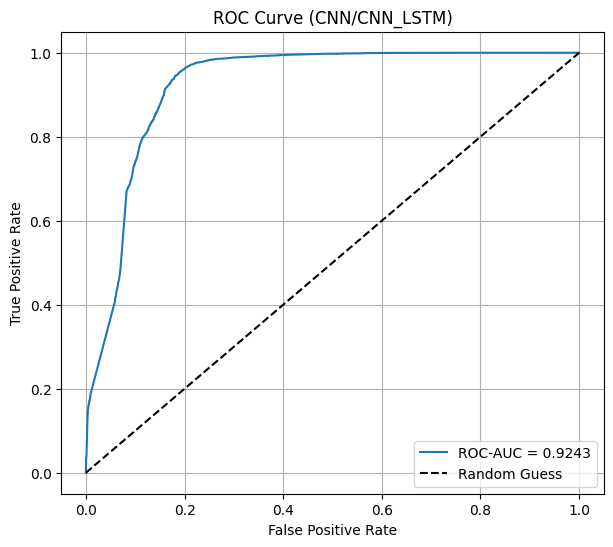

PR-AUC : 0.8995
ROC-AUC: 0.9243


(np.float64(0.8995447960699838), np.float64(0.9243165910365219))

In [ ]:
pr_roc_CNN(X_test4, Y_test4, CNN_model2)

In [ ]:
!mv /content/PhiUSIIL_CNN_URL_Embedding.keras /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_Embedding.keras

In [ ]:
cnn_model = load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_Embedding.keras")
result = predict_url_realtime_keras(
    "https://idt.oc.onos.session2-lonos-encuentra-facilmente-servidores.hitek.mx/identifier?pageMessage=wrong-mandant-redirect~~activating&login_hint=",
    w2v_model,
    cnn_model,
    embedding_dim=50
)
result

Tokens: ['https', 'idt', 'oc', 'onos', 'session2-lonos-encuentra-facilmente-servidores', 'hitek', 'mx', 'identifier', 'pagemessage=wrong-mandant-redirectactivating', 'loginhint=']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


{'url': 'https://idt.oc.onos.session2-lonos-encuentra-facilmente-servidores.hitek.mx/identifier?pageMessage=wrong-mandant-redirect~~activating&login_hint=',
 'tokens': ['https',
  'idt',
  'oc',
  'onos',
  'session2-lonos-encuentra-facilmente-servidores',
  'hitek',
  'mx',
  'identifier',
  'pagemessage=wrong-mandant-redirectactivating',
  'loginhint='],
 'embedding_shape': (1, 50, 1),
 'label': 'Phishing',
 'probability_phishing': 0.9954695967026055,
 'probability_benign': 0.004530403297394514}

# CNN Explain Using SHAP (URL Embedding)

In [ ]:
import shap
import tensorflow as tf
import numpy as np
import joblib

X_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_train_embed.pkl")
X_test4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/X_test_embed.pkl")
Y_train4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_train_embed.pkl")
Y_test4 = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/Y_test_embed.pkl")

# Kiểm tra kiểu dữ liệu
print(f"Y_train4 type: {type(Y_train4)}")
print(f"Y_test4 type: {type(Y_test4)}")

# Chuyển đổi sang numpy array
if hasattr(Y_train4, 'values'):
    Y_train4 = Y_train4.values
if hasattr(Y_test4, 'values'):
    Y_test4 = Y_test4.values

# Đảm bảo là numpy array 1D
Y_train4 = np.array(Y_train4).flatten()
Y_test4 = np.array(Y_test4).flatten()

# Reset index về 0, 1, 2, ...
Y_train4 = np.array([Y_train4[i] for i in range(len(Y_train4))])
Y_test4 = np.array([Y_test4[i] for i in range(len(Y_test4))])

X_train4 = np.expand_dims(X_train4, axis=-1)
X_test4 = np.expand_dims(X_test4, axis=-1)

print(f"\nAfter conversion:")
print(f"Y_train4 shape: {Y_train4.shape}")
print(f"Y_test4 shape: {Y_test4.shape}")
print(f"Y_train4 type: {type(Y_train4)}")

CNN_model2 = tf.keras.models.load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_Embedding.keras")

Y_train4 type: <class 'pandas.core.series.Series'>
Y_test4 type: <class 'pandas.core.series.Series'>

After conversion:
Y_train4 shape: (389635,)
Y_test4 shape: (97409,)
Y_train4 type: <class 'numpy.ndarray'>


In [ ]:
# Tạo background set cân bằng (1000 benign + 1000 phish)
benign_indices_train = np.where(Y_train4 == 1)[0]
phish_indices_train = np.where(Y_train4 == 0)[0]

# Lấy ngẫu nhiên 5000 mẫu từ mỗi class
np.random.seed(42)  # Để có thể tái tạo kết quả
benign_sample_train = np.random.choice(benign_indices_train, size=1000, replace=False)
phish_sample_train = np.random.choice(phish_indices_train, size=1000, replace=False)

# Kết hợp và tạo background
background_indices = np.concatenate([benign_sample_train, phish_sample_train])
np.random.shuffle(background_indices)  # Trộn ngẫu nhiên
background = X_train4[background_indices]

print(f"Background shape: {background.shape}")
print(f"Background labels distribution: Benign={np.sum(Y_train4[background_indices] == 1)}, Phish={np.sum(Y_train4[background_indices] == 0)}")

Background shape: (2000, 50, 1)
Background labels distribution: Benign=1000, Phish=1000


In [ ]:
# Tạo test set cân bằng (5000 benign + 5000 phish)
benign_indices_test = np.where(Y_test4 == 1)[0]
phish_indices_test = np.where(Y_test4 == 0)[0]

benign_sample_test = np.random.choice(benign_indices_test, size=5000, replace=False)
phish_sample_test = np.random.choice(phish_indices_test, size=5000, replace=False)

# Kết hợp và tạo test set
test_indices = np.concatenate([benign_sample_test, phish_sample_test])
np.random.shuffle(test_indices)  # Trộn ngẫu nhiên
X_test_balanced = X_test4[test_indices]
Y_test_balanced = Y_test4[test_indices]

print(f"Test set shape: {X_test_balanced.shape}")
print(f"Test labels distribution: Benign={np.sum(Y_test_balanced == 1)}, Phish={np.sum(Y_test_balanced == 0)}")

Test set shape: (10000, 50, 1)
Test labels distribution: Benign=5000, Phish=5000


In [ ]:
# # Tạo test set cân bằng (2500 benign + 2500 phish)
# benign_indices_test = np.where(Y_test4 == 1)[0]
# phish_indices_test = np.where(Y_test4 == 0)[0]

# benign_sample_test = np.random.choice(benign_indices_test, size=2500, replace=False)
# phish_sample_test = np.random.choice(phish_indices_test, size=2500, replace=False)

# # Kết hợp và tạo test set
# test_indices = np.concatenate([benign_sample_test, phish_sample_test])
# np.random.shuffle(test_indices)  # Trộn ngẫu nhiên
# X_test_balanced = X_test4[test_indices]
# Y_test_balanced = Y_test4[test_indices]

# print(f"Test set shape: {X_test_balanced.shape}")
# print(f"Test labels distribution: Benign={np.sum(Y_test_balanced == 1)}, Phish={np.sum(Y_test_balanced == 0)}")

Test set shape: (5000, 50, 1)
Test labels distribution: Benign=2500, Phish=2500


In [ ]:
explainer = shap.DeepExplainer(CNN_model2, background)
shap_values = explainer.shap_values(X_test_balanced)

print("Output classes:", len(shap_values))
print("Shape SHAP values:", shap_values[0].shape)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=['Tensor(shape=(2000, 50, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=['Tensor(shape=(4000, 50, 1))']
  warnings.warn(msg)


Output classes: 10000
Shape SHAP values: (50, 1, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_3
Received: inputs=['Tensor(shape=(10000, 50, 1))']
  warnings.warn(msg)


In [ ]:
if isinstance(shap_values, list):
    # Nếu list có 2 phần tử (Softmax), lấy index 1. Nếu 1 phần tử (Sigmoid), lấy index 0.
    shap_to_plot = shap_values[1] if len(shap_values) > 1 else shap_values[0]
else:
    shap_to_plot = shap_values

print("Raw shap_values shape:", np.array(shap_to_plot).shape)

X_test_2d = np.squeeze(X_test_balanced)
shap_to_plot_2d = np.squeeze(shap_to_plot)

print(f"SHAP shape for plotting: {shap_to_plot_2d.shape}")
print(f"X shape for plotting: {X_test_2d.shape}")


Raw shap_values shape: (10000, 50, 1, 1)
SHAP shape for plotting: (10000, 50)
X shape for plotting: (10000, 50)


In [ ]:
# if isinstance(shap_values, list):
#     shap_values = shap_values[0]

# print("Raw shap_values shape:", np.array(shap_values).shape)


Raw shap_values shape: (5000, 50, 1, 1)


In [ ]:
import numpy as np
np.save("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_WordCNN_URL_EMBEDDING_SHAP/shap_to_plot_2d.npy", shap_to_plot_2d)
np.save("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_WordCNN_URL_EMBEDDING_SHAP/X_test_2d.npy", X_test_2d)

In [ ]:
shap_to_plot_2d = np.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_WordCNN_URL_EMBEDDING_SHAP/shap_to_plot_2d.npy", allow_pickle=True)
X_test_2d = np.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_WordCNN_URL_EMBEDDING_SHAP/X_test_2d.npy", allow_pickle=True)

In [ ]:
# import numpy as np
# np.save("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_EMBEDDING_SHAP/shap_values.npy", shap_values)
# np.save("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_EMBEDDING_SHAP/X_test2d.npy", X_test2)

In [ ]:
# shap_values = np.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_EMBEDDING_SHAP/shap_values.npy", allow_pickle=True)
# X_test2d = np.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_URL_EMBEDDING_SHAP/X_test2d.npy")

In [ ]:
# shap_values_2d = shap_values.reshape(shap_values.shape[0], shap_values.shape[1])
# #X_test2d = X_test4[:5000].reshape(5000, 100) #Bỏ comment trong trường hợp chạy lỗi
# explainer = shap.DeepExplainer(CNN_model2, background)

/tmp/ipython-input-1908891974.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


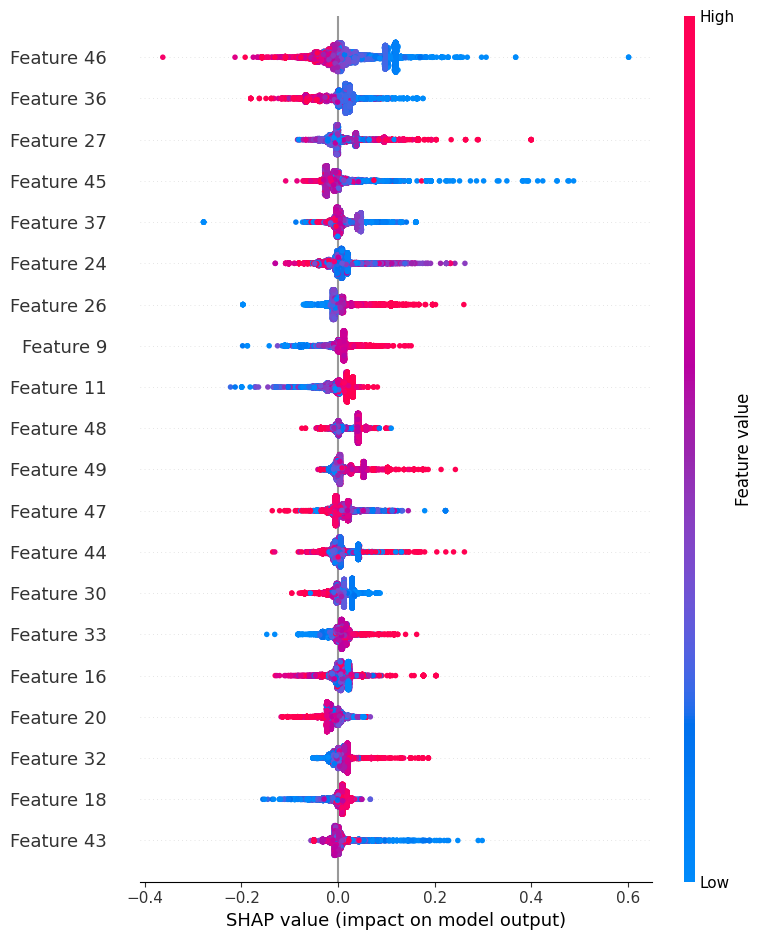

In [ ]:
shap.summary_plot(
    shap_to_plot_2d,
    X_test_2d,
    feature_names=None,
    max_display=20
)

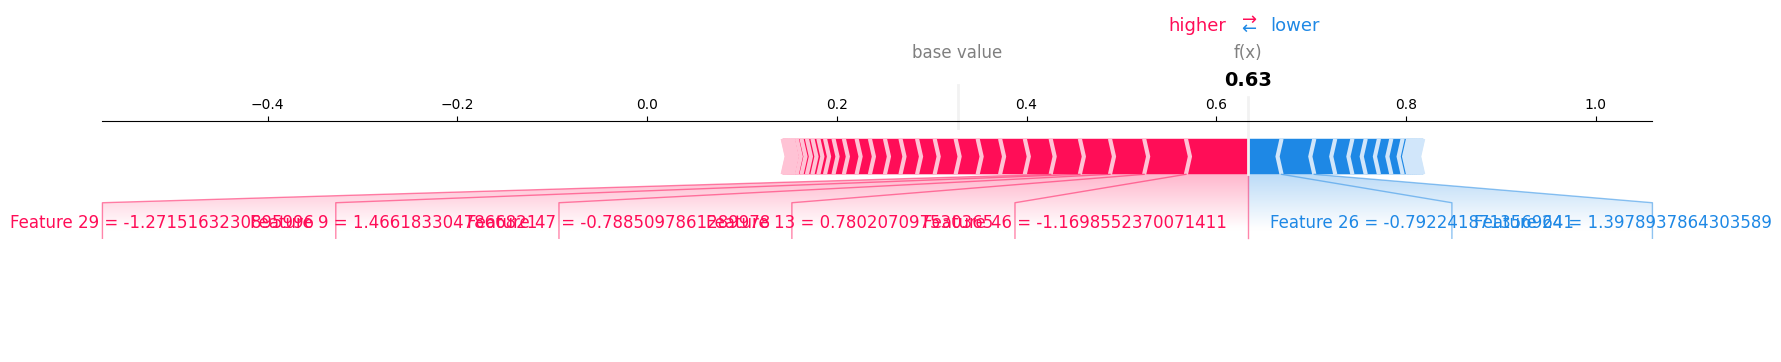

In [ ]:
shap.initjs()

if isinstance(explainer.expected_value, (list, np.ndarray)):
    base_value = float(explainer.expected_value[0])
else:
    base_value = float(explainer.expected_value)

sample_idx = 57
feature_names = [f"Feature {i}" for i in range(X_test_2d.shape[1])]

shap.force_plot(
    base_value,
    shap_to_plot_2d[sample_idx],
    X_test_2d[sample_idx],
    feature_names=feature_names,
    matplotlib=True
)

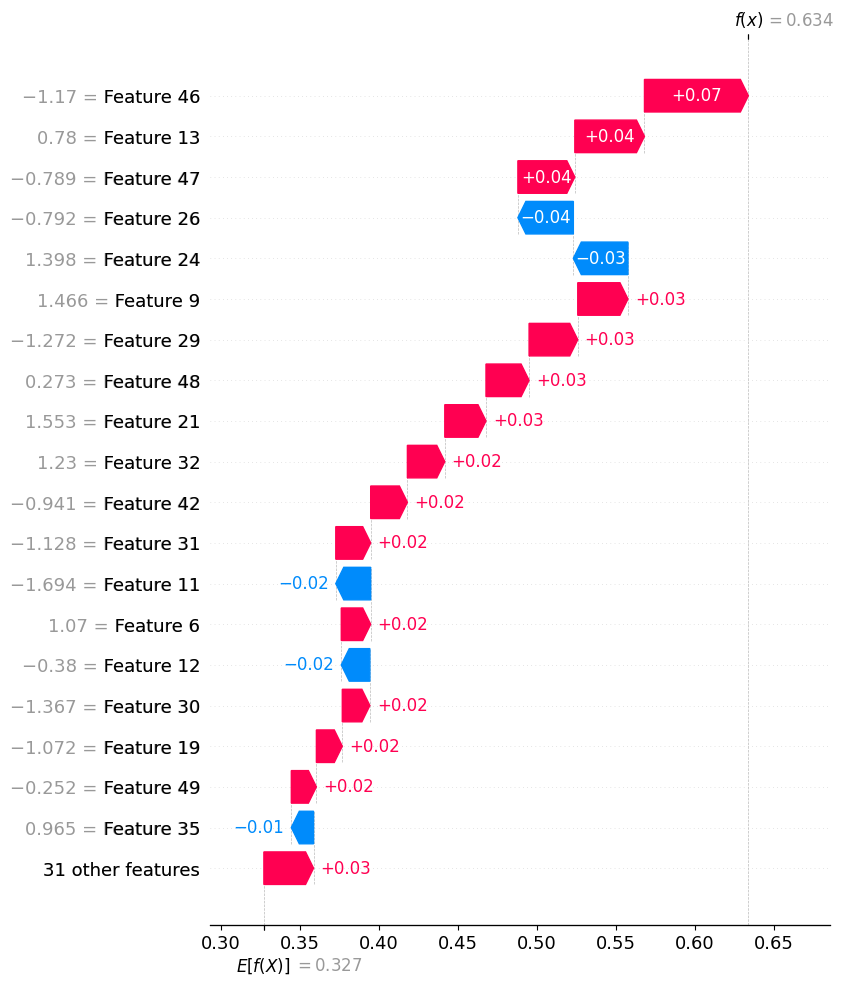

In [ ]:
explanation = shap.Explanation(
    values=shap_to_plot_2d[sample_idx],
    base_values=base_value,
    data=X_test_2d[sample_idx],
    feature_names=feature_names
)

shap.plots.waterfall(explanation, max_display=20)

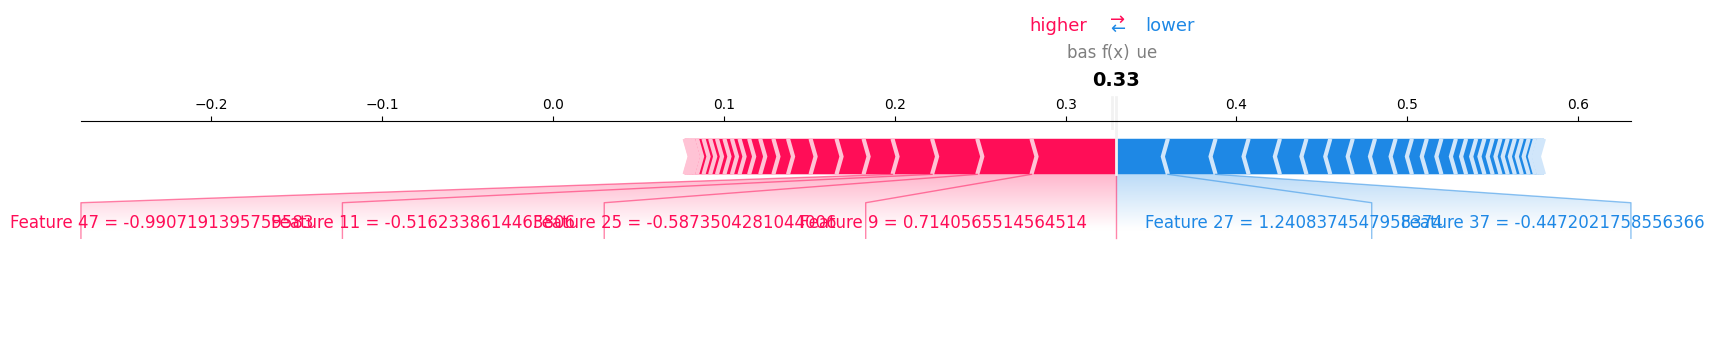

In [ ]:
shap.initjs()

if isinstance(explainer.expected_value, (list, np.ndarray)):
    base_value = float(explainer.expected_value[0])
else:
    base_value = float(explainer.expected_value)

sample_idx = 33

shap.force_plot(
    base_value,
    shap_to_plot_2d[sample_idx],
    X_test_2d[sample_idx],
    feature_names=feature_names,
    matplotlib=True
)

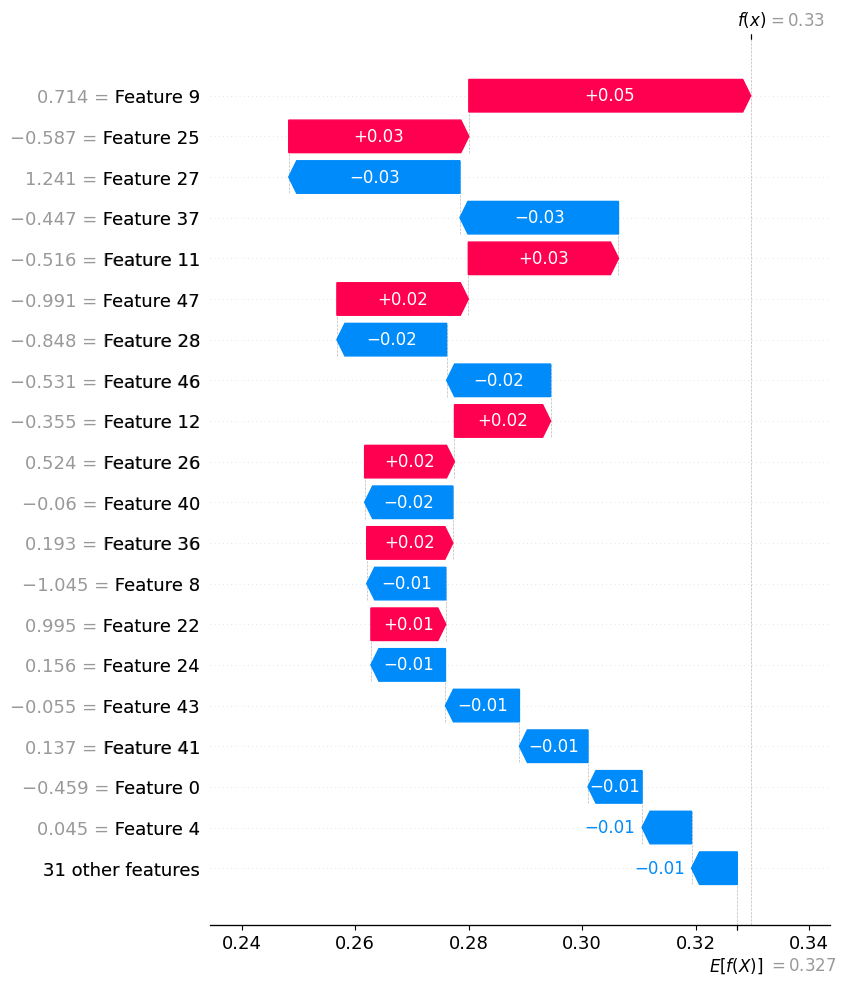

In [ ]:
explanation = shap.Explanation(
    values=shap_to_plot_2d[sample_idx],
    base_values=base_value,
    data=X_test_2d[sample_idx],
    feature_names=feature_names
)

shap.plots.waterfall(explanation, max_display=20)

In [ ]:
from gensim.models import Word2Vec
import numpy as np

w2v = Word2Vec.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_URL2Vec.model")
tokens = list(w2v.wv.index_to_key)       # list token trong vocab
vectors = w2v.wv.vectors  # shape = (vocab_size, embedding_dim)

In [ ]:
def top_tokens_for_dim(dim, topn=10):
    """
    Trả về top token có giá trị embedding lớn nhất và nhỏ nhất tại chiều `dim`.
    """
    values = vectors[:, dim]
    sorted_idx = np.argsort(values)

    # top âm (nhỏ nhất)
    low_tokens = [(tokens[i], values[i]) for i in sorted_idx[:topn]]
    # top dương (lớn nhất)
    high_tokens = [(tokens[i], values[i]) for i in sorted_idx[-topn:]]

    return low_tokens, high_tokens

In [ ]:
dim = 46
low, high = top_tokens_for_dim(dim, topn=10)

print(f"Chiều {dim} - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print(f"\nChiều {dim} - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 46 - Top token kéo âm:
info: -4.9611
wixsite: -4.7803
eu: -4.5883
yahoo: -4.2215
topic: -4.1671
pl: -4.0995
group: -4.0515
my-site: -3.9558
tech: -3.7521
ly: -3.6089

Chiều 46 - Top token kéo dương:
tripod: 2.0587
home: 2.0818
at: 2.3395
storageapi: 2.6598
angelfire: 2.7886
fleek: 2.8390
qrco: 2.9917
jp: 3.1690
r2: 3.5312
de: 4.1995


In [ ]:
dim = 44
low, high = top_tokens_for_dim(dim, topn=10)

print(f"Chiều {dim} - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print(f"\nChiều {dim} - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 44 - Top token kéo âm:
pl: -2.6198
site: -2.5952
square: -2.0455
angelfire: -1.4862
xsph: -1.4279
page: -1.3834
http: -1.3107
english: -1.1788
t: -1.1773
emailexample.com: -1.0491

Chiều 44 - Top token kéo dương:
05: 3.8300
articles: 3.8923
cgi-bin: 3.9168
weebly: 3.9395
2011: 3.9936
cn: 3.9967
blogspot: 4.1455
webpage: 4.1469
info: 4.7785
it: 6.2854


In [ ]:
dim = 36
low, high = top_tokens_for_dim(dim, topn=10)

print(f"Chiều {dim} - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print(f"\nChiều {dim} - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 36 - Top token kéo âm:
ac: -3.8128
uk: -2.2335
co: -2.2022
biz: -1.7286
or: -1.7152
software: -1.3530
ne: -1.2167
cs: -1.1511
cse: -1.1495
ed: -1.0577

Chiều 36 - Top token kéo dương:
d: 4.2509
workers: 4.2541
webflow: 4.2988
xsph: 4.4915
watch: 4.6070
io: 4.6817
edit: 4.6964
github: 4.7492
ml: 4.8112
cf: 4.8487


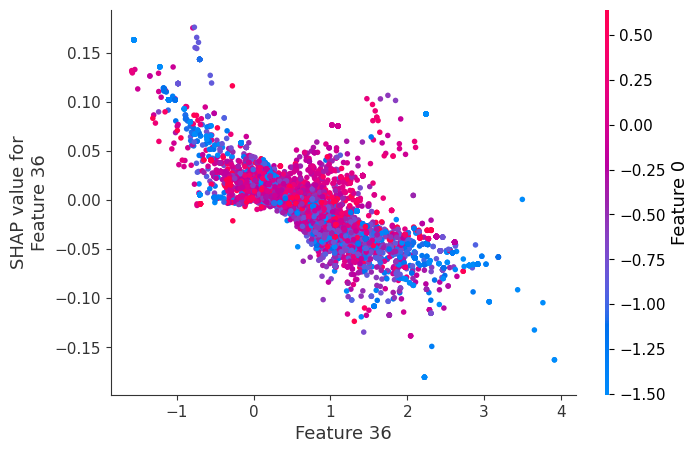

In [ ]:
shap.dependence_plot("Feature 36", shap_to_plot_2d, X_test_2d)

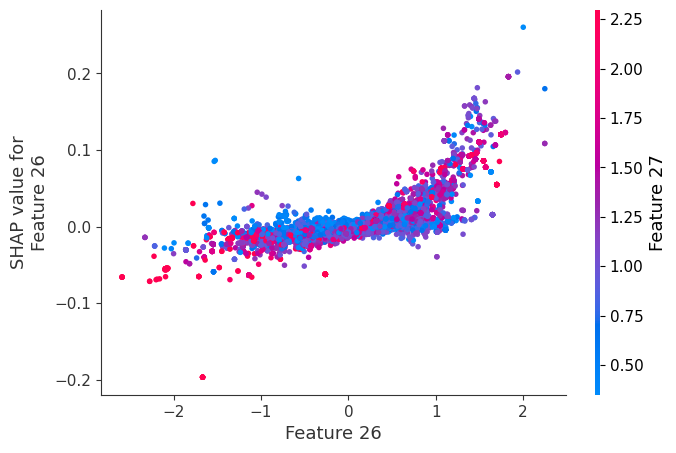

In [ ]:
shap.dependence_plot("Feature 26", shap_to_plot_2d, X_test_2d)

In [ ]:
low, high = top_tokens_for_dim(22, topn=10)

print("Chiều 22 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 22 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

Chiều 22 - Top token kéo âm:
facebook: -2.7920
tripod: -2.6147
ca: -2.0536
cfd: -1.9007
index.html: -1.3577
fr: -1.3363
shop: -1.2061
icu: -1.1204
sbs: -1.0373
ly: -0.9800

Chiều 22 - Top token kéo dương:
group: 4.4249
js: 4.4467
to: 4.6003
yahoo: 4.9419
view: 5.3424
new: 5.4201
in: 5.7027
express: 6.0297
adobe: 6.7609
webpage: 6.8816


In [ ]:
shap.dependence_plot("Feature 75", shap_values_2d, X_test2d)

ValueError: Could not find feature named: Feature 75

In [ ]:
low, high = top_tokens_for_dim(75, topn=10)

print("Chiều 75 - Top token kéo âm:")
for tok, val in low:
    print(f"{tok}: {val:.4f}")

print("\nChiều 75 - Top token kéo dương:")
for tok, val in high:
    print(f"{tok}: {val:.4f}")

IndexError: index 75 is out of bounds for axis 1 with size 50

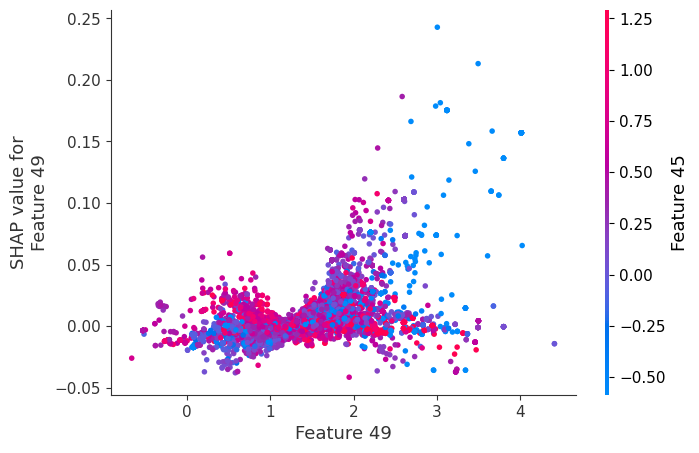

In [ ]:
shap.dependence_plot("Feature 49", shap_to_plot_2d, X_test_2d)

In [ ]:
shap.dependence_plot("Feature 59", shap_to_plot_2d, X_test_2d)

ValueError: Could not find feature named: Feature 59

In [ ]:
shap.dependence_plot("Feature 57", shap_values_2d, X_test2d)

ValueError: Could not find feature named: Feature 57

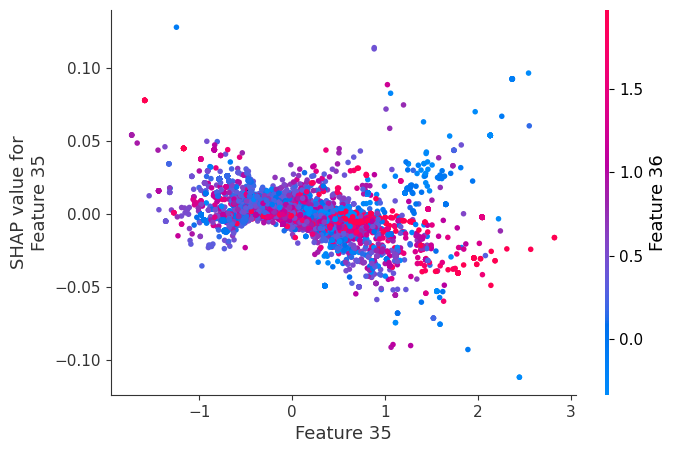

In [ ]:
shap.dependence_plot("Feature 35", shap_to_plot_2d, X_test_2d)

# Training & Evaluation CNN-LSTM With URL-Embedding

In [ ]:
import tensorflow as tf
CNN_LSTM_model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(curve='PR', name="pr_auc")
    ]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'PhiUSIIL_CNN_LSTM_URL_Embedding.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=15,
        verbose=1
    )
]

CNN_LSTM_results_2 = CNN_LSTM_model2.fit(
    X_train4, Y_train4,
    validation_split=0.2,
    batch_size=128,
    epochs=200,
    callbacks=callbacks
)

Epoch 1/200
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8455 - loss: 0.3472 - pr_auc: 0.9145 - precision: 0.8345 - recall: 0.8655
Epoch 1: val_loss improved from inf to 0.23629, saving model to PhiUSIIL_CNN_LSTM_URL_Embedding.keras
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8455 - loss: 0.3472 - pr_auc: 0.9145 - precision: 0.8346 - recall: 0.8655 - val_accuracy: 0.9075 - val_loss: 0.2363 - val_pr_auc: 0.9588 - val_precision: 0.8912 - val_recall: 0.9304
Epoch 2/200
2435/2436 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8991 - loss: 0.2558 - pr_auc: 0.9525 - precision: 0.8815 - recall: 0.9260
Epoch 2: val_loss improved from 0.23629 to 0.22503, saving model to PhiUSIIL_CNN_LSTM_URL_Embedding.keras
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.8991 - loss: 0.2558 - pr_auc: 0.9525 - precision: 0.8815 - recall: 0.9260 - val_accuracy: 0.9146 - val_loss: 0.2250 - val_pr_auc: 0.9623 - val_precision: 0.8993 - val_recall: 0.9355
Epoch 3/200
2435/2436 

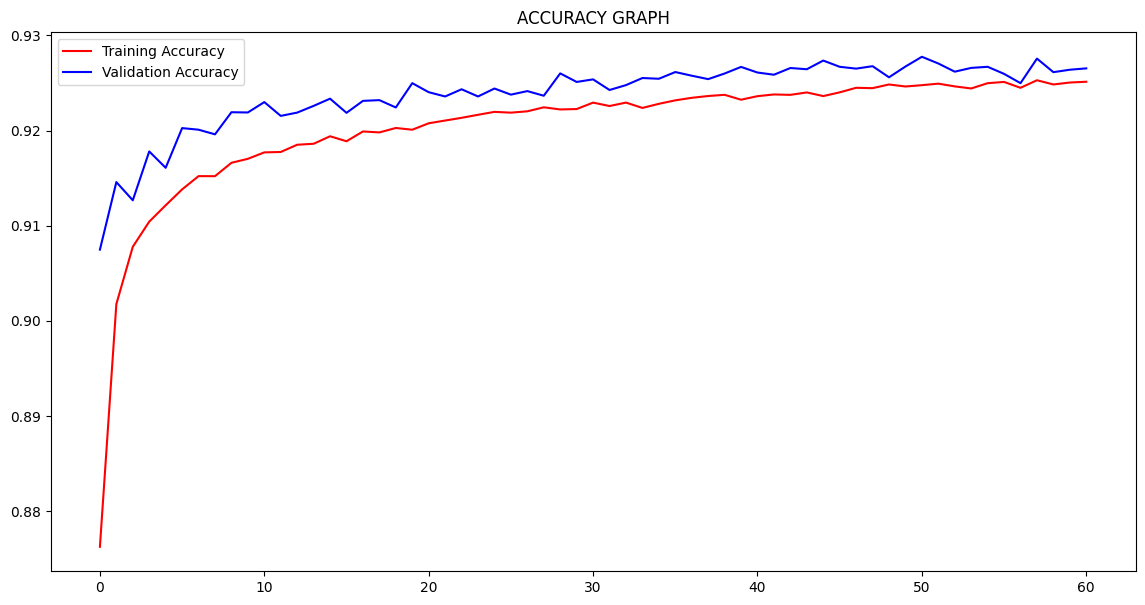

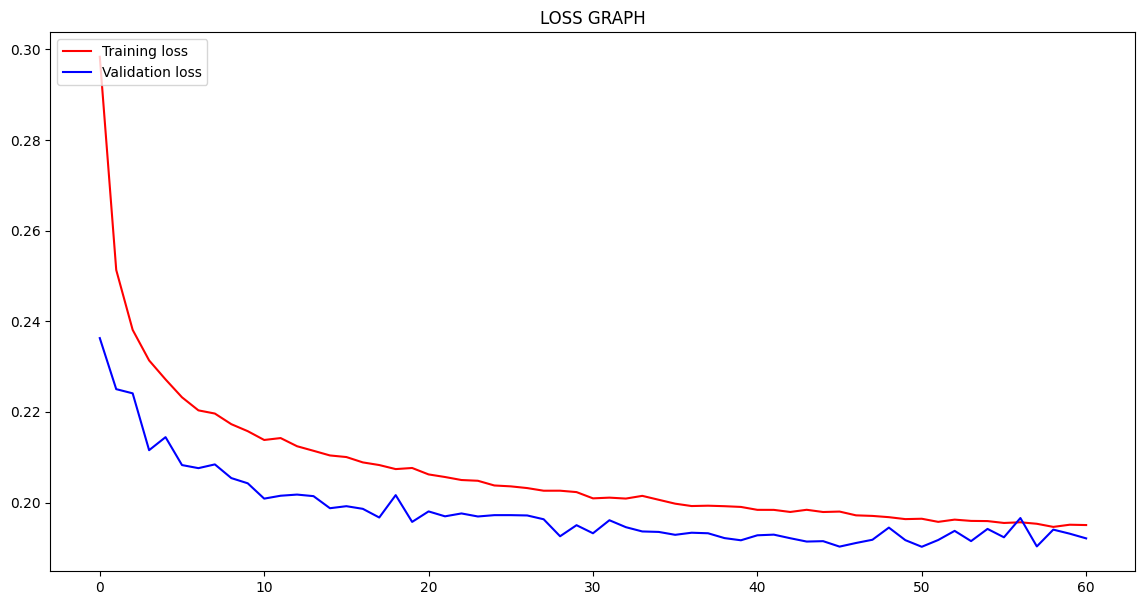

In [ ]:
eval_graph_CNN(CNN_LSTM_results_2)

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


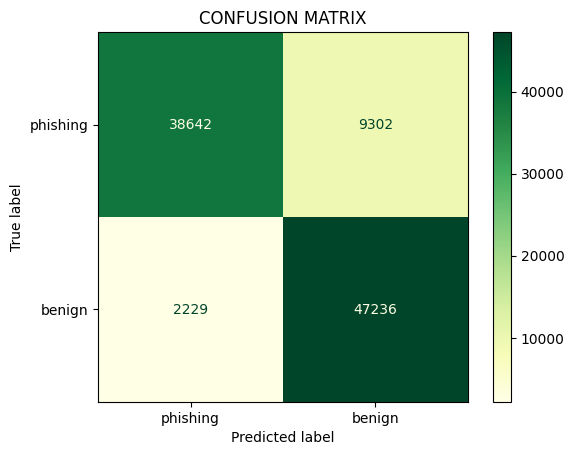

F1-Score: 0.8912


In [ ]:
conf_matrix_CNN(X_test4, Y_test4, CNN_LSTM_model2, label_names=['phishing', 'benign'])

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


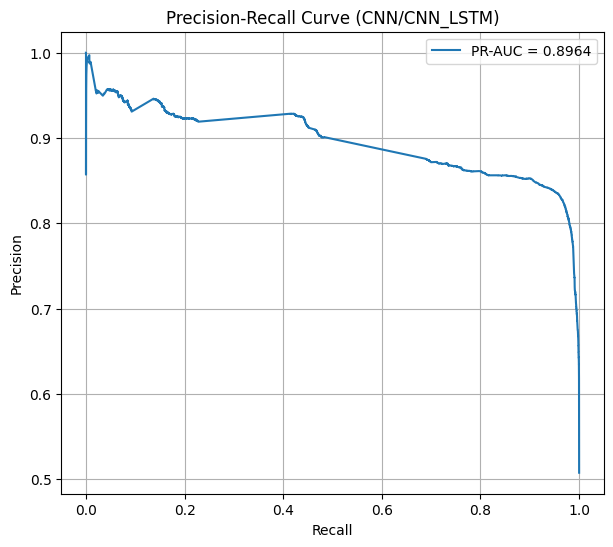

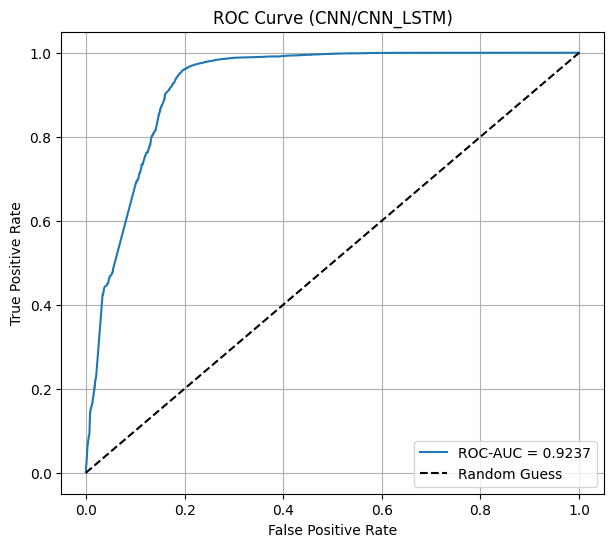

PR-AUC : 0.8964
ROC-AUC: 0.9237


(np.float64(0.8963867987992481), np.float64(0.9236597060767802))

In [ ]:
pr_roc_CNN(X_test4, Y_test4, CNN_LSTM_model2)

In [ ]:
!mv /content/PhiUSIIL_CNN_LSTM_URL_Embedding.keras /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_LSTM_URL_Embedding.keras

In [ ]:
cnn_lstm_model = load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_LSTM_URL_Embedding.keras")
result = predict_url_realtime_keras(
    "https://github.com/",
    w2v_model,
    cnn_lstm_model,
    embedding_dim=50
)
result

Tokens: ['https', 'github', 'com']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


{'url': 'https://github.com/',
 'tokens': ['https', 'github', 'com'],
 'embedding_shape': (1, 50, 1),
 'label': 'Phishing',
 'probability_phishing': 0.999064986652229,
 'probability_benign': 0.0009350133477710187}

# CNN_LSTM Explain Using LIME (Embedding)

In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, joblib
from lime.lime_tabular import LimeTabularExplainer
import keras

In [ ]:
BASE = "/content/drive/MyDrive/DeAnTotNghiep"
OUT_CSV = os.path.join(BASE, "LIME_CNNLSTM_EMB_importance.csv")
OUT_PNG = os.path.join(BASE, "LIME_CNNLSTM_EMB_top15.png")
OUT_DIR_SAMPLES = os.path.join(BASE, "LIME_Plots_CNNLSTM_EMB")
os.makedirs(OUT_DIR_SAMPLES, exist_ok=True)

In [ ]:
CLASS_NAMES = ['phishing','benign']  # 0=phish, 1=benign
TOPK = 15
SEED = 42

In [ ]:
def ensure_2d(a):
    a = np.asarray(a)
    return np.squeeze(a, -1) if a.ndim == 3 and a.shape[-1] == 1 else a


In [ ]:
# 1) Load embedding 2D cho LIME
if os.path.exists(os.path.join(BASE,"X_train_embed.pkl")):
    X_train4 = joblib.load(os.path.join(BASE,"X_train_embed.pkl"))
    X_test4  = joblib.load(os.path.join(BASE,"X_test_embed.pkl"))
    Y_test4  = joblib.load(os.path.join(BASE,"Y_test_embed.pkl"))
else:
    X_train4 = ensure_2d(np.load(os.path.join(BASE,"X_train4.npy")))
    X_test4  = ensure_2d(np.load(os.path.join(BASE,"X_test4.npy")))
    Y_test4  = np.load(os.path.join(BASE,"Y_test4.npy"))


In [ ]:
X_train4 = np.asarray(X_train4, dtype=np.float32)  # (N,100)
X_test4  = np.asarray(X_test4,  dtype=np.float32)  # (N,100)

In [ ]:
CAND_CNNLSTM = [
    os.path.join(BASE, "PhiUSIIL_CNN_LSTM_URL_Embedding.keras"),
    os.path.join(BASE, "PhiUSIIL_CNN_LSTM_Embedding.keras"),
    os.path.join(BASE, "CNN_LSTM_URL_Embedding.keras"),
]

In [ ]:
cnn_lstm_emb = None
for p in CAND_CNNLSTM:
    if os.path.exists(p):
        try:
            cnn_lstm_emb = keras.saving.load_model(p, compile=False, safe_mode=False)
            print("[OK] Loaded CNN-LSTM (Embedding):", p)
            break
        except Exception as e:
            print("[WARN] load_model failed:", p, e)

if cnn_lstm_emb is None:
    # Fallback:
    assert 'CNN_LSTM_model2' in globals(), \
        "Không tìm thấy file .keras của CNN-LSTM embedding và cũng không có biến CNN_LSTM_model2 trong session."
    cnn_lstm_emb = CNN_LSTM_model2
    print("[OK] Using in-memory CNN_LSTM_model2")

[OK] Loaded CNN-LSTM (Embedding): /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CNN_LSTM_URL_Embedding.keras


In [ ]:
# Warm-up để build (numpy, không wrap tf.keras)
_ = cnn_lstm_emb(np.zeros((1, 50, 1), dtype=np.float32))
print("[OK] Warmed up CNN-LSTM embedding.")

[OK] Warmed up CNN-LSTM embedding.


In [ ]:
#Hàm dự đoán cho LIME: nhận (N,100) -> (N,100,1)
def predict_proba_cnnlstm_emb(x2d):
    x3d = np.expand_dims(x2d.astype(np.float32), axis=-1)  # (N,100)->(N,100,1)
    y = cnn_lstm_emb(x3d, training=False)
    try:
        y = y.numpy()
    except Exception:
        pass
    p1 = y.reshape(-1)
    p0 = 1.0 - p1
    return np.stack([p0, p1], axis=1)

In [ ]:
#LIME explainer
expl_cnnlstm_emb = LimeTabularExplainer(
    training_data=X_train4,
    feature_names=[f"emb{i}" for i in range(X_train4.shape[1])],
    class_names=CLASS_NAMES,
    discretize_continuous=True,
    mode='classification'
)

In [ ]:
np.random.seed(SEED)
N = X_test4.shape[0]
take = min(600, N)
idx = np.random.choice(np.arange(N), size=take, replace=False)

F = X_train4.shape[1]
contrib = np.zeros((take, F), dtype=np.float32)

for j, i in enumerate(idx):
    exp = expl_cnnlstm_emb.explain_instance(
        X_test4[i], predict_proba_cnnlstm_emb,
        num_features=15, top_labels=2
    )
    for rule, w in exp.as_list(label=1):  # label=1 benign
        tok = rule.split()[0]  # "embK"
        if tok.startswith("emb"):
            try:
                k = int(tok[3:])
                if 0 <= k < F:
                    contrib[j, k] += abs(float(w))
            except Exception:
                pass

imp = contrib.mean(axis=0)  # (100,)
pd.DataFrame({
    "feature": [f"emb{i}" for i in range(F)],
    "importance_abs_mean": imp
}).to_csv(OUT_CSV, index=False)
print("[Saved]", OUT_CSV)


[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_CNNLSTM_EMB_importance.csv


In [ ]:
top = np.argsort(imp)[::-1][:TOPK]
feats = [f"emb{i}" for i in top][::-1]
vals  = imp[top][::-1]

plt.figure(figsize=(8,5))
plt.barh(feats, vals)  # KHÔNG set màu theo yêu cầu
plt.xlabel("|LIME| mean contribution")
plt.title("CNN-LSTM (Embedding) – Top-15 by |LIME|")
plt.tight_layout(); plt.savefig(OUT_PNG, dpi=150); plt.close()
print("[Saved]", OUT_PNG)

[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_CNNLSTM_EMB_top15.png


In [ ]:
def lime_barplot(exp, label=1, title="CNN-LSTM-EMB – LIME per-sample", savepath=None):
    pairs = exp.as_list(label=label)  # [(rule, weight), ...]
    if not pairs:
        print("[WARN] Không có rule để vẽ."); return

    # sắp xếp theo |weight|
    rules, weights = zip(*pairs)
    order = np.argsort(np.abs(weights))[::-1]
    rules   = [rules[i] for i in order]
    weights = [weights[i] for i in order]

    plt.figure(figsize=(8,5))
    y = list(range(len(rules)))[::-1]
    w = list(weights)[::-1]
    r = list(rules)[::-1]
    plt.barh(y, w)
    plt.yticks(y, r)
    plt.xlabel("LIME contribution (±)")
    plt.title(title)
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=150)
        plt.close()
        print("[Saved]", savepath)
    else:
        plt.show()

for i in [0, 1, 2]:
    exp = expl_cnnlstm_emb.explain_instance(
        X_test4[i], predict_proba_cnnlstm_emb,
        num_features=15, top_labels=2
    )
    png_path = os.path.join(OUT_DIR_SAMPLES, f"LIME_CNNLSTM_EMB_sample_{i}.png")
    lime_barplot(
        exp, label=1,
        title=f"CNN-LSTM-EMB – Sample {i} (label=1 benign)",
        savepath=png_path
    )

print("Hoàn tất CNN-LSTM Explain Using LIME (Embedding).")

[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_CNNLSTM_EMB/LIME_CNNLSTM_EMB_sample_0.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_CNNLSTM_EMB/LIME_CNNLSTM_EMB_sample_1.png
[Saved] /content/drive/MyDrive/DeAnTotNghiep/LIME_Plots_CNNLSTM_EMB/LIME_CNNLSTM_EMB_sample_2.png
Hoàn tất CNN-LSTM Explain Using LIME (Embedding).


# Prepare Train/Test For CharCNN/CharCNN-LSTM

In [ ]:
import numpy as np
import string
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
def clean_url(url):
    url = url.lower().strip()
    url = re.sub(r'\s+', '', url)
    return url

In [ ]:
chars = list(string.ascii_lowercase + string.digits + "/:._?=-@")
char_to_idx = {c: i+1 for i, c in enumerate(chars)}  # 0 để padding
vocab_size = len(char_to_idx) + 1
MAX_LEN = 200

def url_to_sequence(url, char_to_idx, max_len=MAX_LEN):
    url = clean_url(url)
    seq = [char_to_idx.get(ch, 0) for ch in url if ch in char_to_idx]
    return pad_sequences([seq], maxlen=max_len, padding='post', truncating='post')[0]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_final_dataset.csv', sep=';')
df.head(10)

url  label
0     https://google.com      1
1   https://facebook.com      1
2    https://youtube.com      1
3      https://baidu.com      1
4      https://yahoo.com      1
5     https://amazon.com      1
6  https://wikipedia.org      1
7         https://qq.com      1
8    https://twitter.com      1
9   https://google.co.in      1

In [ ]:
X_train_urls, X_test_urls, Y_train, Y_test = train_test_split(
    df['url'], df['label'],
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)

In [ ]:
X_train_urls = X_train_urls.apply(clean_url)
X_test_urls = X_test_urls.apply(clean_url)

In [ ]:
tokenizer = Tokenizer(
    char_level=True,         # Kích hoạt chế độ ký tự
    lower=True,              # Chuyển tất cả về lowercase
    filters='',              # Không loại bỏ ký tự nào
    oov_token='<UNK>'        # Token cho ký tự không nằm trong vocab
)

In [ ]:
tokenizer.fit_on_texts(X_train_urls)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(f"✅ Vocabulary size (char-level): {vocab_size}")

✅ Vocabulary size (char-level): 91


In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train_urls)
X_test_seq = tokenizer.texts_to_sequences(X_test_urls)

In [ ]:
X_train7 = pad_sequences(X_train_seq, maxlen=200, padding='post', truncating='post')
X_test7 = pad_sequences(X_test_seq, maxlen=200, padding='post', truncating='post')

In [ ]:
Y_train7 = np.array(Y_train)
Y_test7 = np.array(Y_test)

In [ ]:
import joblib
joblib.dump(tokenizer, "/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_Char_Tokenizer.joblib")
joblib.dump(X_train7, "/content/drive/MyDrive/DeAnTotNghiep/X_train7.pkl")
joblib.dump(X_test7, "/content/drive/MyDrive/DeAnTotNghiep/X_test7.pkl")
joblib.dump(Y_train7, "/content/drive/MyDrive/DeAnTotNghiep/Y_train7.pkl")
joblib.dump(Y_test7, "/content/drive/MyDrive/DeAnTotNghiep/Y_test7.pkl")

['/content/drive/MyDrive/DeAnTotNghiep/Y_test7.pkl']

In [ ]:
print(X_train7.shape, X_test7.shape)

(389635, 200) (97409, 200)


In [ ]:
X_train7[:1]

array([[10,  2,  2,  8,  4, 18,  3,  3, 11, 11, 11,  7, 40,  6, 15, 12,
        10,  5, 19,  7, 16,  5,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int32)

# Training & Evaluating CharCNN With Char Embedding

In [ ]:
import tensorflow as tf

CharCNN_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(curve='PR', name="pr_auc")
    ]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'PhiUSIIL_CharCNN_URL.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1
    )
]

CharCNN_results = CharCNN_model.fit(
    X_train7, Y_train7,
    validation_split=0.2,
    batch_size=64,
    epochs=200,
    callbacks=callbacks
)

print("\n🎯 Evaluate on test set:")
test_loss, test_acc, test_prec, test_rec, test_pr_auc = CharCNN_model.evaluate(X_test7, Y_test7, verbose=1)

print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"PR AUC: {test_pr_auc:.4f}")


Epoch 1/200
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9084 - loss: 0.2278 - pr_auc: 0.9633 - precision: 0.9040 - recall: 0.9155
Epoch 1: val_loss improved from inf to 0.15176, saving model to PhiUSIIL_CharCNN_URL.keras
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.9084 - loss: 0.2278 - pr_auc: 0.9633 - precision: 0.9040 - recall: 0.9155 - val_accuracy: 0.9437 - val_loss: 0.1518 - val_pr_auc: 0.9828 - val_precision: 0.9340 - val_recall: 0.9560
Epoch 2/200
4870/4871 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9481 - loss: 0.1411 - pr_auc: 0.9847 - precision: 0.9339 - recall: 0.9663
Epoch 2: val_loss improved from 0.15176 to 0.13396, saving model to PhiUSIIL_CharCNN_URL.keras
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.9481 - loss: 0.1411 - pr_auc: 0.9847 - precision: 0.9339 - recall: 0.9663 - val_accuracy: 0.9508 - val_loss: 0.1340 - val_pr_auc: 0.9859 - val_precision: 0.9340 - val_recall: 0.9712
Epoch 3/200
4869/4871 ━━━━━━━━━━━━━━━━━━━━ 0s 8

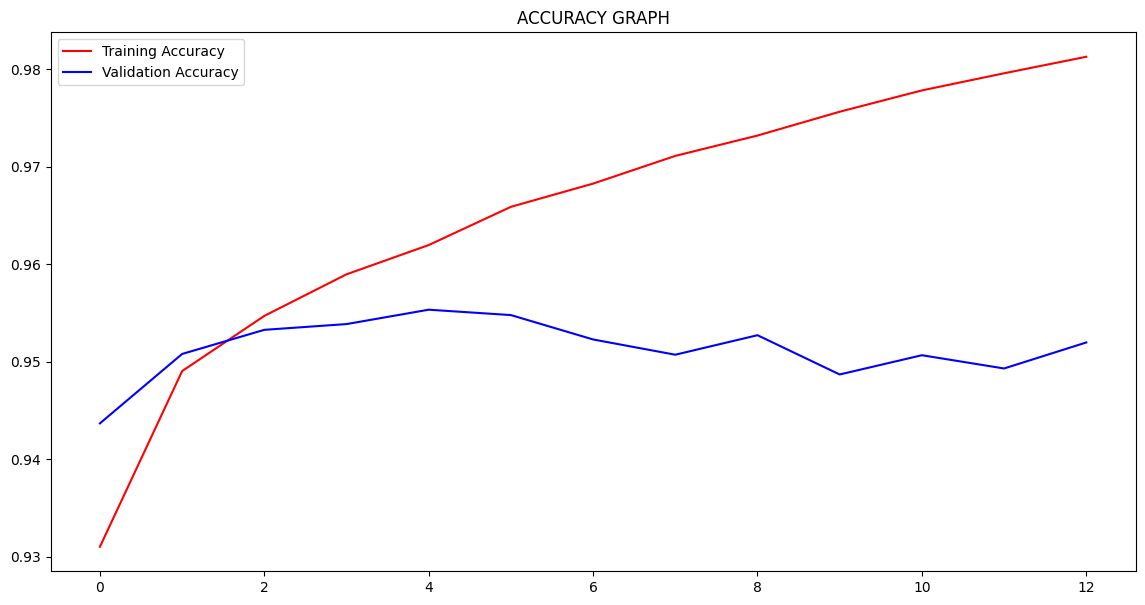

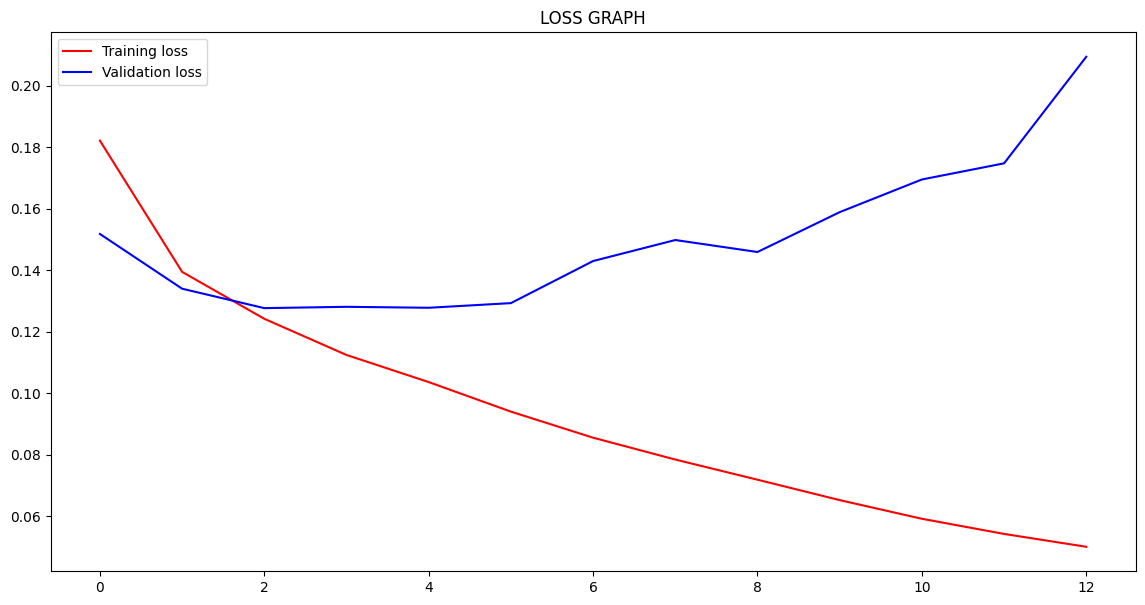

In [ ]:
eval_graph_CNN(CharCNN_results)

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


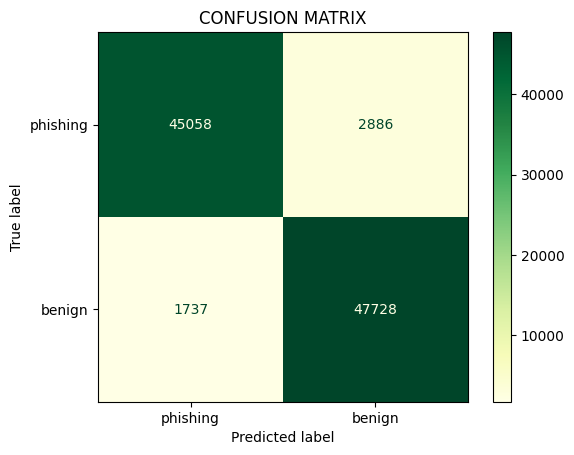

F1-Score: 0.9538


In [ ]:
conf_matrix_CNN(X_test7, Y_test7, CharCNN_model, label_names=['phishing', 'benign'])

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


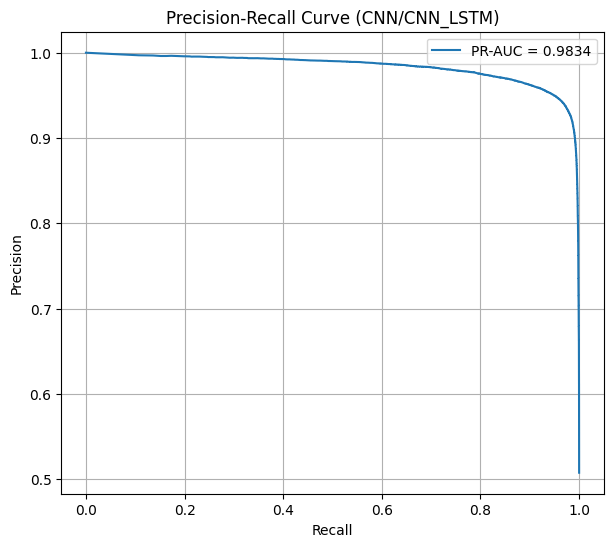

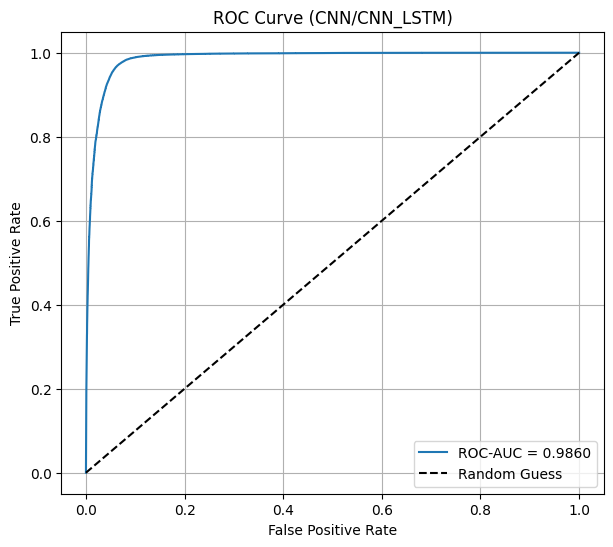

PR-AUC : 0.9834
ROC-AUC: 0.9860


(np.float64(0.983418407690934), np.float64(0.9860258396158773))

In [ ]:
pr_roc_CNN(X_test7, Y_test7, CharCNN_model)

In [ ]:
!mv /content/PhiUSIIL_CharCNN_URL.keras /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CharCNN_URL.keras

In [ ]:
import numpy as np
import re
import string
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

CharCNN_model = load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CharCNN_URL.keras")
char_tokenizer = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_Char_Tokenizer.joblib")

In [ ]:
!mv /content/PhiUSIIL_CharCNN_URL.keras /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CharCNN_URL.keras

In [ ]:
MAX_LEN = 200

def clean_url(url: str) -> str:
    """Chuẩn hóa URL: lowercase + loại bỏ khoảng trắng"""
    url = url.lower().strip()
    url = re.sub(r'\s+', '', url)
    return url

def url_to_sequence(url: str, char_tokenizer, max_len: int = MAX_LEN):
    """Chuyển URL thành chuỗi số (sequence)"""
    url = clean_url(url)
    seq = char_tokenizer.texts_to_sequences([url])
    return pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

def predict_url(url_input: str):
    seq = url_to_sequence(url_input, char_tokenizer)
    pred = CharCNN_model.predict(seq, verbose=0)[0][0]

    label = "Benign 🟢" if pred >= 0.5 else "Phishing 🔴"

    print(f"🔗 URL: {url_input}")
    print(f"🔮 Dự đoán: {label} (xác suất: {pred:.4f})")

    return label, pred

In [ ]:
print(url_to_sequence("https://www.flexclip.com/", char_tokenizer))

[[10  2  2  8  4 18  3  3 11 11 11  7 23 17  5 32 12 17 13  8  7 12  6 14
   3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]]


In [ ]:
predict_url("https://www.flexclip.com/")

🔗 URL: https://www.flexclip.com/
🔮 Dự đoán: Benign 🟢 (xác suất: 0.6525)


('Benign 🟢', np.float32(0.6524838))

# Training & Evaluating CharCNN-LSTM With Char Embedding

In [ ]:
import tensorflow as tf

CharCNN_LSTM_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(curve='PR', name="pr_auc")
    ]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'PhiUSIIL_CharCNN_LSTM_URL.keras',
        verbose=1,
        save_best_only=True
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=10,
        verbose=1
    )
]

CharCNN_LSTM_results = CharCNN_LSTM_model.fit(
    X_train7, Y_train7,
    validation_split=0.2,
    batch_size=64,
    epochs=200,
    callbacks=callbacks
)

print("\n🎯 Evaluate on test set:")
test_loss, test_acc, test_prec, test_rec, test_pr_auc = CharCNN_LSTM_model.evaluate(X_test7, Y_test7, verbose=1)

print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"PR AUC: {test_pr_auc:.4f}")

Epoch 1/200
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8975 - loss: 0.2533 - pr_auc: 0.9566 - precision: 0.8919 - recall: 0.9092
Epoch 1: val_loss improved from inf to 0.15696, saving model to PhiUSIIL_CharCNN_LSTM_URL.keras
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 98s 18ms/step - accuracy: 0.8975 - loss: 0.2533 - pr_auc: 0.9566 - precision: 0.8919 - recall: 0.9092 - val_accuracy: 0.9416 - val_loss: 0.1570 - val_pr_auc: 0.9812 - val_precision: 0.9214 - val_recall: 0.9668
Epoch 2/200
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9460 - loss: 0.1466 - pr_auc: 0.9836 - precision: 0.9312 - recall: 0.9654
Epoch 2: val_loss improved from 0.15696 to 0.13223, saving model to PhiUSIIL_CharCNN_LSTM_URL.keras
4871/4871 ━━━━━━━━━━━━━━━━━━━━ 86s 18ms/step - accuracy: 0.9460 - loss: 0.1466 - pr_auc: 0.9836 - precision: 0.9312 - recall: 0.9654 - val_accuracy: 0.9518 - val_loss: 0.1322 - val_pr_auc: 0.9861 - val_precision: 0.9326 - val_recall: 0.9750
Epoch 3/200
4869/4871 ━━━━━━━━━━━━

In [ ]:
!mv /content/PhiUSIIL_CharCNN_LSTM_URL.keras /content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CharCNN_LSTM_URL.keras

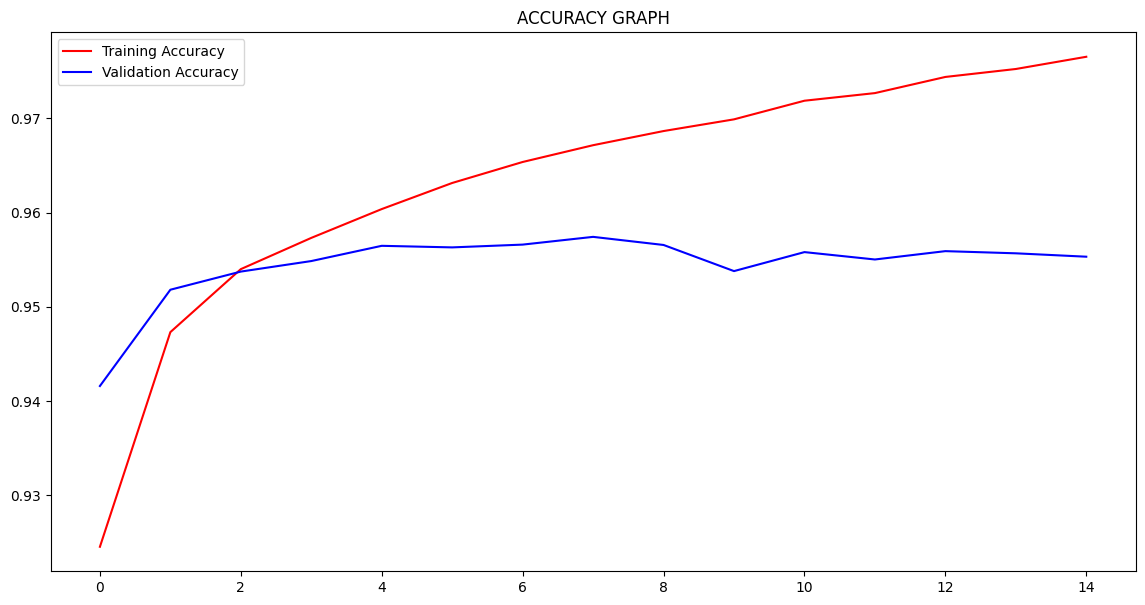

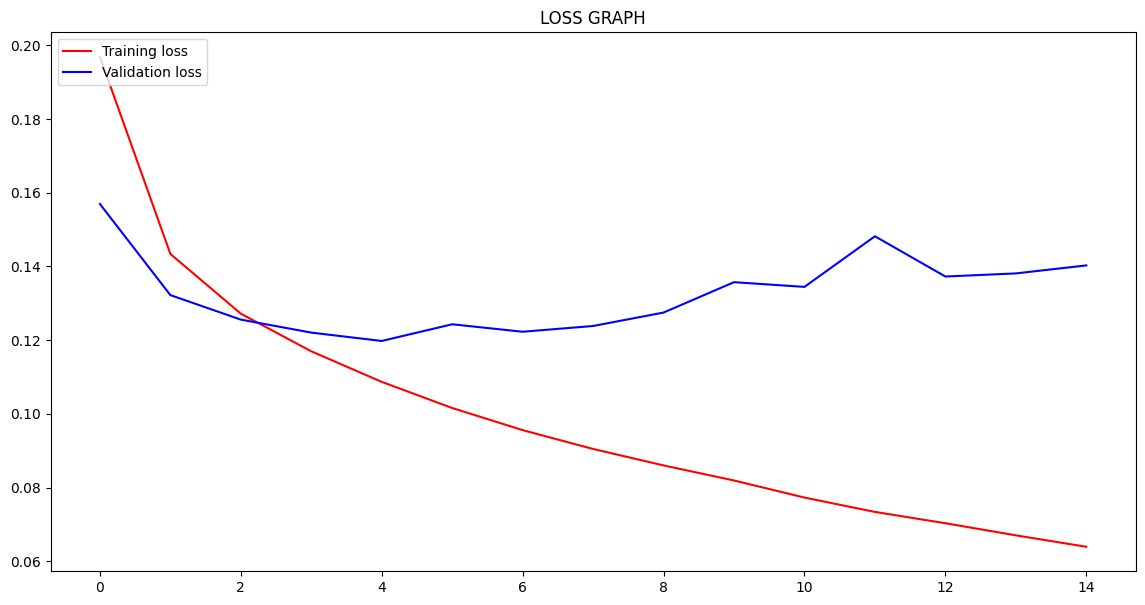

In [ ]:
eval_graph_CNN(CharCNN_LSTM_results)

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step


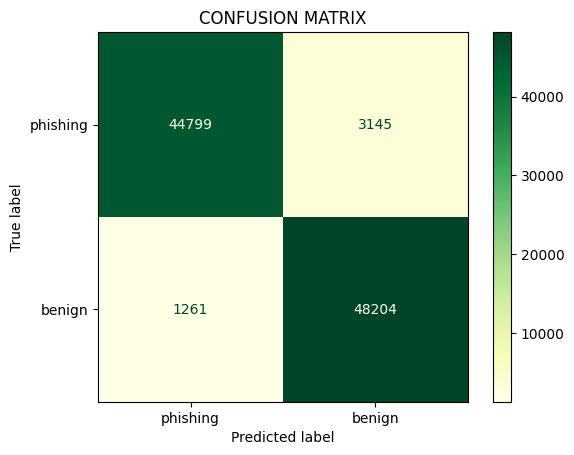

F1-Score: 0.9563


In [ ]:
conf_matrix_CNN(X_test7, Y_test7, CharCNN_LSTM_model, label_names=['phishing', 'benign'])

3045/3045 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step


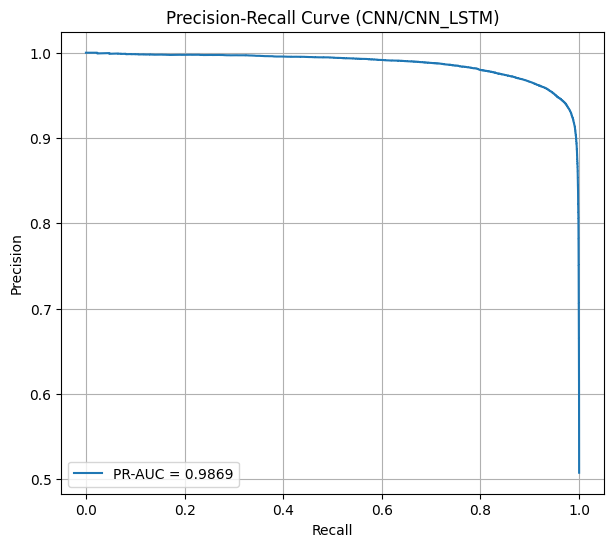

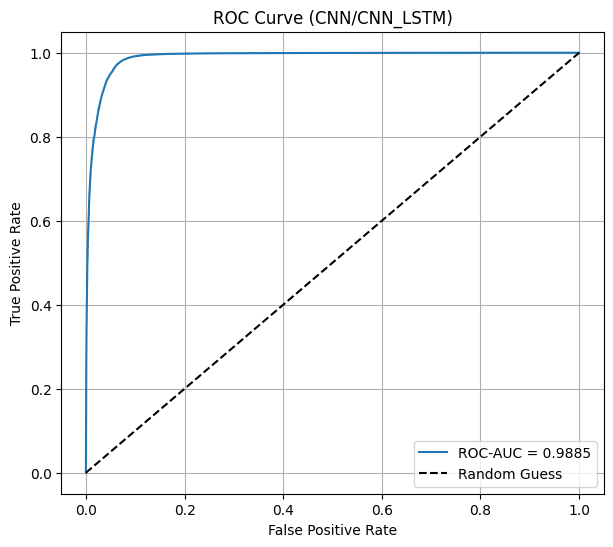

PR-AUC : 0.9869
ROC-AUC: 0.9885


(np.float64(0.9868572722607278), np.float64(0.9884525291636698))

In [ ]:
pr_roc_CNN(X_test7, Y_test7, CharCNN_LSTM_model)

In [ ]:
import numpy as np
import re
import string
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

CharCNN_LSTM_model = load_model("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_CharCNN_LSTM_URL.keras")
char_tokenizer = joblib.load("/content/drive/MyDrive/DeAnTotNghiep/PhiUSIIL_Char_Tokenizer.joblib")

In [ ]:
MAX_LEN = 200

def clean_url(url: str) -> str:
    """Chuẩn hóa URL: lowercase + loại bỏ khoảng trắng"""
    url = url.lower().strip()
    url = re.sub(r'\s+', '', url)
    return url

def url_to_sequence(url: str, char_tokenizer, max_len: int = MAX_LEN):
    """Chuyển URL thành chuỗi số (sequence)"""
    url = clean_url(url)
    seq = char_tokenizer.texts_to_sequences([url])
    return pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

def predict_url(url_input: str):
    seq = url_to_sequence(url_input, char_tokenizer)
    pred = CharCNN_LSTM_model.predict(seq, verbose=0)[0][0]

    # 🧠 Nếu model output gần 1 → Benign; gần 0 → Phish
    label = "Benign 🟢" if pred >= 0.5 else "Phishing 🔴"

    print(f"🔗 URL: {url_input}")
    print(f"🔮 Dự đoán: {label} (xác suất: {pred:.4f})")

    return label, pred

In [ ]:
predict_url("https://www.flexclip.com/")

🔗 URL: https://www.flexclip.com/
🔮 Dự đoán: Benign 🟢 (xác suất: 0.7928)


('Benign 🟢', np.float32(0.79282))